In [ ]:
import string
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
import os

drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
# Membaca data dari file CSV
data = pd.read_excel('/content/drive/MyDrive/Skripsi/data_skripsi/data_label_0_1.xlsx')
data.head()

,label,textDisplay
0,0,"sayang macet,dari sy SMA sampe lulus kuliah,ja..."
1,0,Kebanyakan kota di indonesia jalan raya kecil ...
2,0,Masih macet
3,0,APANYA YANG MAJU...YANG BERDUIT...YANG SUSAH P...
4,0,Jembatan flyover nya udah tua kurang menarik d...


In [ ]:
#Case Folding
data['textDisplay'] = data['textDisplay'].str.lower()
print('Case Folding Result : \n')
print(data['textDisplay'].head(5))
print('\n\n\n')
import string, re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

Case Folding Result : 

0    sayang macet,dari sy sma sampe lulus kuliah,ja...
1    kebanyakan kota di indonesia jalan raya kecil ...
2                                          masih macet
3    apanya yang maju...yang berduit...yang susah p...
4    jembatan flyover nya udah tua kurang menarik d...
Name: textDisplay, dtype: object






[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data.head()

,label,textDisplay
0,0,"sayang macet,dari sy sma sampe lulus kuliah,ja..."
1,0,kebanyakan kota di indonesia jalan raya kecil ...
2,0,masih macet
3,0,apanya yang maju...yang berduit...yang susah p...
4,0,jembatan flyover nya udah tua kurang menarik d...


In [ ]:
#Tokenizing
def remove_comments_special(text):
    #menghapus karakter khusus dalam teks, seperti tab, newline, dan backslash
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\'," ").replace('.'," ").replace(','," ")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
data['textDisplay'] = data['textDisplay'].apply(remove_comments_special)

#menghapus angka dalam teks dengan menggunakan regular expression
def remove_number(text):
    return  re.sub(r"\d+", " ", text)
data['textDisplay'] = data['textDisplay'].apply(remove_number)
#menghapus emotikon dari teks menggunakan regular expression
def remove_emoticons(text):
    emoticon_pattern = re.compile("["
                                 u"\U0001F600-\U0001F64F"  # emoticons
                                 u"\U0001F300-\U0001F5FF"  # simbol & piktogram
                                 u"\U0001F680-\U0001F6FF"  # transportasi & simbol peralatan
                                 u"\U0001F1E0-\U0001F1FF"  # bendera negara
                                 u"\U00002702-\U000027B0"  # simbol lainnya
                                 u"\U000024C2-\U0001F251"
                                 "]+", flags=re.UNICODE)
    return emoticon_pattern.sub(r'', text)
data['textDisplay'] = data['textDisplay'].apply(remove_emoticons)
#data['review'] = data['review'].apply(remove_number)
def remove_punctuation(text):
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator).replace(",", " ")
data['textDisplay'] = data['textDisplay'].apply(remove_punctuation)
# menghapus spasi yang ada di awal dan akhir teks menggunakan str.strip()
def remove_whitespace_LT(text):
    return text.strip()
data['textDisplay'] = data['textDisplay'].apply(remove_whitespace_LT)
#menghapus spasi berlebih dalam teks dengan menggantinya dengan satu spasi menggunakan regular expression
def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text)
data['textDisplay'] = data['textDisplay'].apply(remove_extra_spaces)
#mengganti multiple whitespace (spasi berturut-turut) dengan satu spasi menggunakan regular expression
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)
data['textDisplay'] = data['textDisplay'].apply(remove_whitespace_multiple)
#menghapus huruf yang berulang dalam teks
def remove_repeated_letters(text):
    return re.sub(r"(.)\1+", r"\1", text)
data['textDisplay'] = data['textDisplay'].apply(remove_repeated_letters)

#menghapus kata-kata yang terdiri dari satu huruf (single character) dalam teks menggunakan regular expression
def filter_length(text):
    text_filtered = ' '.join(word for word in re.split(r'\s', text) if 1 < len(word))
    return text_filtered
data['textDisplay'] = data['textDisplay'].apply(filter_length)



#mengubah kalimat menjadi token
def word_tokenize_wrapper(text):
    return word_tokenize(text)
data['comments_tokens'] = data['textDisplay'].apply(word_tokenize_wrapper)
print('Tokenizing Result : \n')
print(data['comments_tokens'].head())
print('\n\n\n')

data.head()


Tokenizing Result : 

0    [sayang, macet, dari, sy, sma, sampe, lulus, k...
1    [kebanyakan, kota, di, indonesia, jalan, raya,...
2                                       [masih, macet]
3    [apanya, yang, maju, yang, berduit, yang, susa...
4    [jembatan, flyover, nya, udah, tua, kurang, me...
Name: comments_tokens, dtype: object






,label,textDisplay,comments_tokens
0,0,sayang macet dari sy sma sampe lulus kuliah ja...,"[sayang, macet, dari, sy, sma, sampe, lulus, k..."
1,0,kebanyakan kota di indonesia jalan raya kecil ...,"[kebanyakan, kota, di, indonesia, jalan, raya,..."
2,0,masih macet,"[masih, macet]"
3,0,apanya yang maju yang berduit yang susah pas s...,"[apanya, yang, maju, yang, berduit, yang, susa..."
4,0,jembatan flyover nya udah tua kurang menarik d...,"[jembatan, flyover, nya, udah, tua, kurang, me..."


In [ ]:
#Spelling Normalization
normalizad_word = pd.read_csv("https://raw.githubusercontent.com/meisaputri21/Indonesian-Twitter-Emotion-Dataset/master/kamus_singkatan.csv", sep=";", header=None)
normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]
data['comments_normalized'] = data['comments_tokens'].apply(normalized_term)

normalizad_word2 = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRQS3tlUL5EcxYqbbYzFLHmHaqm2npjY-DLyz0dzwMIcUVhfoVWKuhR52P9YCqbAyY9zCgT66JVutWA/pub?output=csv",header=None)
normalizad_word_dict2 = {}

for index, row in normalizad_word2.iterrows():
    if row[0] not in normalizad_word_dict2:
        normalizad_word_dict2[row[0]] = row[1]
def normalized_term2(document):
    return [normalizad_word_dict2[term] if term in normalizad_word_dict2 else term for term in document]
data['comments_normalized'] = data['comments_normalized'].apply(normalized_term2)

In [ ]:
#menyatukan kembali tokenizer menjadi kalimat
def detokenize(token_list):
    # Menggabungkan token dengan spasi sebagai pemisah
    text = ' '.join(token_list)
    return text

data['comments_join'] = data['comments_normalized'].apply(detokenize)

print(data)

      label                                        textDisplay  \
0         0  sayang macet dari sy sma sampe lulus kuliah ja...   
1         0  kebanyakan kota di indonesia jalan raya kecil ...   
2         0                                        masih macet   
3         0  apanya yang maju yang berduit yang susah pas s...   
4         0  jembatan flyover nya udah tua kurang menarik d...   
...     ...                                                ...   
4996      1  asalamualikum kak alhamdulilab bisa menikmati ...   
4997      1   indah sekali sungainya fasilitasnya juga lengkap   
4998      1  masyalalh keren sekali situ patengang bersyuku...   
4999      1  hadir pertama pemandanganya indah sekali biaya...   
5000      1  like situ patengang ciwedey bandung indah kere...   

                                        comments_tokens  \
0     [sayang, macet, dari, sy, sma, sampe, lulus, k...   
1     [kebanyakan, kota, di, indonesia, jalan, raya,...   
2                             

In [ ]:
# menghapus spasi yang ada di awal dan akhir teks menggunakan str.strip()
def remove_whitespace_LT(text):
    return text.strip()
data['comments_join'] = data['comments_join'].apply(remove_whitespace_LT)
#menghapus spasi berlebih dalam teks dengan menggantinya dengan satu spasi menggunakan regular expression
def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text)
data['comments_join'] = data['comments_join'].apply(remove_extra_spaces)
#mengganti multiple whitespace (spasi berturut-turut) dengan satu spasi menggunakan regular expression
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)
data['comments_join'] = data['comments_join'].apply(remove_whitespace_multiple)

#mengubah kalimat menjadi token
def word_tokenize_wrapper(text):
    return word_tokenize(text)
data['comments_tokens_final'] = data['comments_join'].apply(word_tokenize_wrapper)
print('Tokenizing Result : \n')
print(data['comments_tokens_final'].head())
print('\n\n\n')


Tokenizing Result : 

0    [sayang, macet, dari, saya, sama, sampai, lulu...
1    [kebanyakan, kota, di, indonesia, jalan, raya,...
2                                       [masih, macet]
3    [apanya, yang, maju, yang, berduit, yang, susa...
4    [jembatan, flyover, nya, sudah, tua, kurang, m...
Name: comments_tokens_final, dtype: object






In [ ]:
#Stopword Removal
import pandas as pd

file_path = '/content/drive/MyDrive/Skripsi/data_skripsi/stop word indo (3).txt'  # Ganti dengan jalur file yang sesuai

# Baca isi file teks ke dalam list
with open(file_path, 'r') as file:
    lines = file.readlines()

# Mengubah setiap baris menjadi string dengan kutipan ganda
formatted_lines = ['"' + line.strip() + '"' for line in lines]

# Menggabungkan baris-baris menjadi satu string dengan koma sebagai pemisah
formatted_text = ", ".join(formatted_lines)

print(formatted_text)

# List kata stopwords
stopwords_list = formatted_text
def stopwords_removal(words):
    return [word for word in words if word not in stopwords_list]



data['comments_tokens_sw'] = data['comments_tokens_final'].apply(stopwords_removal)
data.head(100)


"ada", "adalah", "adanya", "adapun", "agak", "agaknya", "agar", "akan", "akankah", "akhir", "akhiri", "akhirnya", "aku", "akulah", "amat", "amatlah", "anda", "andalah", "antar", "antara", "antaranya", "apa", "apaan", "apabila", "apakah", "apalagi", "apatah", "artinya", "asal", "asalkan", "atas", "atau", "ataukah", "ataupun", "awal", "awalnya", "bagai", "bagaikan", "bagaimana", "bagaimanakah", "bagaimanapun", "bagi", "bagian", "bahkan", "bahwa", "bahwasanya", "baik", "bakal", "bakalan", "balik", "bandung", "bang", "banyak", "bapak", "baru", "bawah", "bdg", "beberapa", "begini", "beginian", "beginikah", "beginilah", "begitu", "begitukah", "begitulah", "begitupun", "bekerja", "belakang", "belakangan", "belum", "belumlah", "benar", "benarkah", "benarlah", "berada", "berakhir", "berakhirlah", "berakhirnya", "berapa", "berapakah", "berapalah", "berapapun", "berarti", "berawal", "berbagai", "berdatangan", "beri", "berikan", "berikut", "berikutnya", "berjumlah", "berkali-kali", "berkata", "ber

,label,textDisplay,comments_tokens,comments_normalized,comments_join,comments_tokens_final,comments_tokens_sw
0,0,sayang macet dari sy sma sampe lulus kuliah ja...,"[sayang, macet, dari, sy, sma, sampe, lulus, k...","[sayang, macet, dari, saya , sama, sampai, lul...",sayang macet dari saya sama sampai lulus kulia...,"[sayang, macet, dari, saya, sama, sampai, lulu...","[sayang, macet, lulus, kuliah, jalanya]"
1,0,kebanyakan kota di indonesia jalan raya kecil ...,"[kebanyakan, kota, di, indonesia, jalan, raya,...","[kebanyakan, kota, di, indonesia, jalan, raya,...",kebanyakan kota di indonesia jalan raya kecil ...,"[kebanyakan, kota, di, indonesia, jalan, raya,...","[kebanyakan, indonesia, jalan, raya, lebar, ja..."
2,0,masih macet,"[masih, macet]","[masih, macet]",masih macet,"[masih, macet]",[macet]
3,0,apanya yang maju yang berduit yang susah pas s...,"[apanya, yang, maju, yang, berduit, yang, susa...","[apanya, yang, maju, yang, berduit, yang, susa...",apanya yang maju yang berduit yang susah pas s...,"[apanya, yang, maju, yang, berduit, yang, susa...","[apanya, maju, berduit, susah, banga, duniawi,..."
4,0,jembatan flyover nya udah tua kurang menarik d...,"[jembatan, flyover, nya, udah, tua, kurang, me...","[jembatan, flyover, nya, sudah , tua, kurang, ...",jembatan flyover nya sudah tua kurang menarik ...,"[jembatan, flyover, nya, sudah, tua, kurang, m...","[jembatan, flyover, tua, menarik, dipandang]"
...,...,...,...,...,...,...,...
95,0,aestetik aestetik cuman setitik tengok bandung...,"[aestetik, aestetik, cuman, setitik, tengok, b...","[aestetik, aestetik, hanya, setitik, menjenguk...",aestetik aestetik hanya setitik menjenguk band...,"[aestetik, aestetik, hanya, setitik, menjenguk...","[aestetik, aestetik, setitik, menjenguk, pesis..."
96,0,emang bandung itu kurang penenerangan gk mence...,"[emang, bandung, itu, kurang, penenerangan, gk...","[memang , bandung, itu, kurang, penenerangan, ...",memang bandung itu kurang penenerangan tidak m...,"[memang, bandung, itu, kurang, penenerangan, t...","[penenerangan, mencerminkan, indah, kbnyakan, ..."
97,0,sekalinya ke bandung hujan deres lgsg kena ban...,"[sekalinya, ke, bandung, hujan, deres, lgsg, k...","[sekalinya, ke, bandung, hujan, deras , langsu...",sekalinya ke bandung hujan deras langsung kena...,"[sekalinya, ke, bandung, hujan, deras, langsun...","[sekalinya, hujan, deras, banjir, jalan]"
98,0,slogan saja gedhe tapi faktanya cuma omong kos...,"[slogan, saja, gedhe, tapi, faktanya, cuma, om...","[slogan, saja, gedhe, tapi, faktanya, cuma, om...",slogan saja gedhe tapi faktanya cuma omong kos...,"[slogan, saja, gedhe, tapi, faktanya, cuma, om...","[slogan, gedhe, faktanya, omong, kosong]"


In [ ]:
print(data['comments_tokens_sw'].head())

data.head()


0              [sayang, macet, lulus, kuliah, jalanya]
1    [kebanyakan, indonesia, jalan, raya, lebar, ja...
2                                              [macet]
3    [apanya, maju, berduit, susah, banga, duniawi,...
4         [jembatan, flyover, tua, menarik, dipandang]
Name: comments_tokens_sw, dtype: object


,label,textDisplay,comments_tokens,comments_normalized,comments_join,comments_tokens_final,comments_tokens_sw
0,0,sayang macet dari sy sma sampe lulus kuliah ja...,"[sayang, macet, dari, sy, sma, sampe, lulus, k...","[sayang, macet, dari, saya , sama, sampai, lul...",sayang macet dari saya sama sampai lulus kulia...,"[sayang, macet, dari, saya, sama, sampai, lulu...","[sayang, macet, lulus, kuliah, jalanya]"
1,0,kebanyakan kota di indonesia jalan raya kecil ...,"[kebanyakan, kota, di, indonesia, jalan, raya,...","[kebanyakan, kota, di, indonesia, jalan, raya,...",kebanyakan kota di indonesia jalan raya kecil ...,"[kebanyakan, kota, di, indonesia, jalan, raya,...","[kebanyakan, indonesia, jalan, raya, lebar, ja..."
2,0,masih macet,"[masih, macet]","[masih, macet]",masih macet,"[masih, macet]",[macet]
3,0,apanya yang maju yang berduit yang susah pas s...,"[apanya, yang, maju, yang, berduit, yang, susa...","[apanya, yang, maju, yang, berduit, yang, susa...",apanya yang maju yang berduit yang susah pas s...,"[apanya, yang, maju, yang, berduit, yang, susa...","[apanya, maju, berduit, susah, banga, duniawi,..."
4,0,jembatan flyover nya udah tua kurang menarik d...,"[jembatan, flyover, nya, udah, tua, kurang, me...","[jembatan, flyover, nya, sudah , tua, kurang, ...",jembatan flyover nya sudah tua kurang menarik ...,"[jembatan, flyover, nya, sudah, tua, kurang, m...","[jembatan, flyover, tua, menarik, dipandang]"


In [ ]:
#Stemming
# import Sastrawi package
! pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
#stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)
term_dict = {}
for document in data['comments_tokens_sw']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
print(term_dict)
print("------------------------")
# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

data['comments_tokens_stemmed'] = data['comments_tokens_sw'].apply(get_stemmed_term)

# data["Ulasan_clean"] = [' '.join(map(str, l)) for l in data['comments_tokens_stemmed']]
# data.to_excel("Data_Skripsi_Bersih_.xlsx")

Streaming output truncated to the last 5000 lines.
analytics : analytics
face : face
recognition : recognition
rea : rea
ngatasi : ngatasi
pencahayan : pencahayan
carang : carang
camera : camera
cangih : cangih
lalin : lalin
setaon : setaon
tertibkan : tertib
babad : babad
jatayu : jatayu
penghuni : huni
ilegal : ilegal
ikutan : ikut
donor : donor
udahanya : udahanya
pingsan : pingsan
berkunang : nang
kunang : nang
ditahan : tahan
hoream : hoream
angeurkan : angeurkan
sasaranya : sasaranya
menegah : tegah
menengah : tengah
dilantik : lantik
pegawai : pegawai
disumpah : sumpah
hisabna : hisabna
berat : berat
terparkir : parkir
sapu : sapu
nyere : nyere
muslim : muslim
minyak : minyak
masakan : masakan
jual : jual
makinacet : makinacet
walikotana : walikotana
raja : raja
bedaskeun : bedaskeun
sabtu : sabtu
pelajar : ajar
mengayuh : kayuh
dikunjungi : kunjung
kemasan : kemas
bekal : bekal
rendahnya : rendah
disiplin : disiplin
membiasakan : biasa
fasilitasnya : fasilitas
perbanyak : banya

In [ ]:
#Stopword Removal
import pandas as pd

file_path = '/content/drive/MyDrive/Skripsi/data_skripsi/stop word indo (3).txt'  # Ganti dengan jalur file yang sesuai

# Baca isi file teks ke dalam list
with open(file_path, 'r') as file:
    lines = file.readlines()

# Mengubah setiap baris menjadi string dengan kutipan ganda
formatted_lines = ['"' + line.strip() + '"' for line in lines]

# Menggabungkan baris-baris menjadi satu string dengan koma sebagai pemisah
formatted_text = ", ".join(formatted_lines)

print(formatted_text)

# List kata stopwords
stopwords_list = formatted_text
def stopwords_removal(words):
    return [word for word in words if word not in stopwords_list]



data['comments_tokens_stemmed'] = data['comments_tokens_stemmed'].apply(stopwords_removal)
data.head(100)


"ada", "adalah", "adanya", "adapun", "agak", "agaknya", "agar", "akan", "akankah", "akhir", "akhiri", "akhirnya", "aku", "akulah", "amat", "amatlah", "anda", "andalah", "antar", "antara", "antaranya", "apa", "apaan", "apabila", "apakah", "apalagi", "apatah", "artinya", "asal", "asalkan", "atas", "atau", "ataukah", "ataupun", "awal", "awalnya", "bagai", "bagaikan", "bagaimana", "bagaimanakah", "bagaimanapun", "bagi", "bagian", "bahkan", "bahwa", "bahwasanya", "baik", "bakal", "bakalan", "balik", "bandung", "bang", "banyak", "bapak", "baru", "bawah", "bdg", "beberapa", "begini", "beginian", "beginikah", "beginilah", "begitu", "begitukah", "begitulah", "begitupun", "bekerja", "belakang", "belakangan", "belum", "belumlah", "benar", "benarkah", "benarlah", "berada", "berakhir", "berakhirlah", "berakhirnya", "berapa", "berapakah", "berapalah", "berapapun", "berarti", "berawal", "berbagai", "berdatangan", "beri", "berikan", "berikut", "berikutnya", "berjumlah", "berkali-kali", "berkata", "ber

,label,textDisplay,comments_tokens,comments_normalized,comments_join,comments_tokens_final,comments_tokens_sw,comments_tokens_stemmed
0,0,sayang macet dari sy sma sampe lulus kuliah ja...,"[sayang, macet, dari, sy, sma, sampe, lulus, k...","[sayang, macet, dari, saya , sama, sampai, lul...",sayang macet dari saya sama sampai lulus kulia...,"[sayang, macet, dari, saya, sama, sampai, lulu...","[sayang, macet, lulus, kuliah, jalanya]","[sayang, macet, lulus, kuliah]"
1,0,kebanyakan kota di indonesia jalan raya kecil ...,"[kebanyakan, kota, di, indonesia, jalan, raya,...","[kebanyakan, kota, di, indonesia, jalan, raya,...",kebanyakan kota di indonesia jalan raya kecil ...,"[kebanyakan, kota, di, indonesia, jalan, raya,...","[kebanyakan, indonesia, jalan, raya, lebar, ja...","[indonesia, jalan, raya, lebar, jakarta, batam..."
2,0,masih macet,"[masih, macet]","[masih, macet]",masih macet,"[masih, macet]",[macet],[macet]
3,0,apanya yang maju yang berduit yang susah pas s...,"[apanya, yang, maju, yang, berduit, yang, susa...","[apanya, yang, maju, yang, berduit, yang, susa...",apanya yang maju yang berduit yang susah pas s...,"[apanya, yang, maju, yang, berduit, yang, susa...","[apanya, maju, berduit, susah, banga, duniawi,...","[maju, duit, susah, banga, duniawi, hidup, sam..."
4,0,jembatan flyover nya udah tua kurang menarik d...,"[jembatan, flyover, nya, udah, tua, kurang, me...","[jembatan, flyover, nya, sudah , tua, kurang, ...",jembatan flyover nya sudah tua kurang menarik ...,"[jembatan, flyover, nya, sudah, tua, kurang, m...","[jembatan, flyover, tua, menarik, dipandang]","[jembatan, flyover, tua, tarik, pandang]"
...,...,...,...,...,...,...,...,...
95,0,aestetik aestetik cuman setitik tengok bandung...,"[aestetik, aestetik, cuman, setitik, tengok, b...","[aestetik, aestetik, hanya, setitik, menjenguk...",aestetik aestetik hanya setitik menjenguk band...,"[aestetik, aestetik, hanya, setitik, menjenguk...","[aestetik, aestetik, setitik, menjenguk, pesis...","[aestetik, aestetik, titik, jenguk, pesisir, b..."
96,0,emang bandung itu kurang penenerangan gk mence...,"[emang, bandung, itu, kurang, penenerangan, gk...","[memang , bandung, itu, kurang, penenerangan, ...",memang bandung itu kurang penenerangan tidak m...,"[memang, bandung, itu, kurang, penenerangan, t...","[penenerangan, mencerminkan, indah, kbnyakan, ...","[penenerangan, cermin, indah, kbnyakan, pikir,..."
97,0,sekalinya ke bandung hujan deres lgsg kena ban...,"[sekalinya, ke, bandung, hujan, deres, lgsg, k...","[sekalinya, ke, bandung, hujan, deras , langsu...",sekalinya ke bandung hujan deras langsung kena...,"[sekalinya, ke, bandung, hujan, deras, langsun...","[sekalinya, hujan, deras, banjir, jalan]","[hujan, deras, banjir, jalan]"
98,0,slogan saja gedhe tapi faktanya cuma omong kos...,"[slogan, saja, gedhe, tapi, faktanya, cuma, om...","[slogan, saja, gedhe, tapi, faktanya, cuma, om...",slogan saja gedhe tapi faktanya cuma omong kos...,"[slogan, saja, gedhe, tapi, faktanya, cuma, om...","[slogan, gedhe, faktanya, omong, kosong]","[slogan, gedhe, fakta, omong, kosong]"


In [ ]:
data["Ulasan_clean"] = [' '.join(map(str, l)) for l in data['comments_tokens_stemmed']]

In [ ]:
def filter_length(text):
    text_filtered = ' '.join(word for word in re.split(r'\s', text) if len(word) >= 4)
    return text_filtered

data['Ulasan_clean_fix'] = data['Ulasan_clean'].apply(filter_length)


In [ ]:
data.head()

,label,textDisplay,comments_tokens,comments_normalized,comments_join,comments_tokens_final,comments_tokens_sw,comments_tokens_stemmed,Ulasan_clean,Ulasan_clean_fix
0,0,sayang macet dari sy sma sampe lulus kuliah ja...,"[sayang, macet, dari, sy, sma, sampe, lulus, k...","[sayang, macet, dari, saya , sama, sampai, lul...",sayang macet dari saya sama sampai lulus kulia...,"[sayang, macet, dari, saya, sama, sampai, lulu...","[sayang, macet, lulus, kuliah, jalanya]","[sayang, macet, lulus, kuliah]",sayang macet lulus kuliah,sayang macet lulus kuliah
1,0,kebanyakan kota di indonesia jalan raya kecil ...,"[kebanyakan, kota, di, indonesia, jalan, raya,...","[kebanyakan, kota, di, indonesia, jalan, raya,...",kebanyakan kota di indonesia jalan raya kecil ...,"[kebanyakan, kota, di, indonesia, jalan, raya,...","[kebanyakan, indonesia, jalan, raya, lebar, ja...","[indonesia, jalan, raya, lebar, jakarta, batam...",indonesia jalan raya lebar jakarta batam lebar...,indonesia jalan raya lebar jakarta batam lebar...
2,0,masih macet,"[masih, macet]","[masih, macet]",masih macet,"[masih, macet]",[macet],[macet],macet,macet
3,0,apanya yang maju yang berduit yang susah pas s...,"[apanya, yang, maju, yang, berduit, yang, susa...","[apanya, yang, maju, yang, berduit, yang, susa...",apanya yang maju yang berduit yang susah pas s...,"[apanya, yang, maju, yang, berduit, yang, susa...","[apanya, maju, berduit, susah, banga, duniawi,...","[maju, duit, susah, banga, duniawi, hidup, sam...",maju duit susah banga duniawi hidup samentawis,maju duit susah banga duniawi hidup samentawis
4,0,jembatan flyover nya udah tua kurang menarik d...,"[jembatan, flyover, nya, udah, tua, kurang, me...","[jembatan, flyover, nya, sudah , tua, kurang, ...",jembatan flyover nya sudah tua kurang menarik ...,"[jembatan, flyover, nya, sudah, tua, kurang, m...","[jembatan, flyover, tua, menarik, dipandang]","[jembatan, flyover, tua, tarik, pandang]",jembatan flyover tua tarik pandang,jembatan flyover tarik pandang


In [ ]:
data.to_excel("Data_Skripsi_Bersih_Fix_.xlsx")

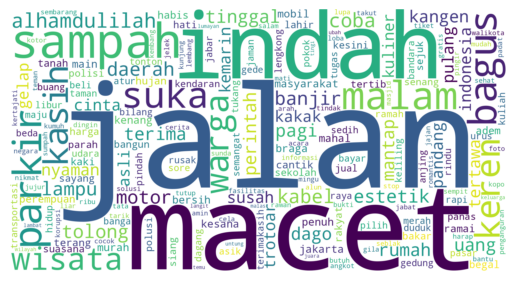

In [ ]:
###WordCloud
#Import Library untuk WordCloud
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

text = " ".join(title for title in data["Ulasan_clean_fix"])
word_cloud = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(text)
#Menyimpan Gambar WordCloud
word_cloud.to_file('wordcloud.png')
#Menampilkan Hasil WordCloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
#load data yang sudah bersih
df_preprocessed=pd.read_excel("/content/Data_Skripsi_Bersih_Fix_ .xlsx")
df_preprocessed

,Unnamed: 0,label,textDisplay,comments_tokens,comments_normalized,comments_join,comments_tokens_final,comments_tokens_sw,comments_tokens_stemmed,Ulasan_clean,Ulasan_clean_fix
0,0,0,sayang macet dari sy sma sampe lulus kuliah ja...,"['sayang', 'macet', 'dari', 'sy', 'sma', 'samp...","['sayang', 'macet', 'dari', 'saya ', 'sama', '...",sayang macet dari saya sama sampai lulus kulia...,"['sayang', 'macet', 'dari', 'saya', 'sama', 's...","['sayang', 'macet', 'lulus', 'kuliah', 'jalanya']","['sayang', 'macet', 'lulus', 'kuliah']",sayang macet lulus kuliah,sayang macet lulus kuliah
1,1,0,kebanyakan kota di indonesia jalan raya kecil ...,"['kebanyakan', 'kota', 'di', 'indonesia', 'jal...","['kebanyakan', 'kota', 'di', 'indonesia', 'jal...",kebanyakan kota di indonesia jalan raya kecil ...,"['kebanyakan', 'kota', 'di', 'indonesia', 'jal...","['kebanyakan', 'indonesia', 'jalan', 'raya', '...","['indonesia', 'jalan', 'raya', 'lebar', 'jakar...",indonesia jalan raya lebar jakarta batam lebar...,indonesia jalan raya lebar jakarta batam lebar...
2,2,0,masih macet,"['masih', 'macet']","['masih', 'macet']",masih macet,"['masih', 'macet']",['macet'],['macet'],macet,macet
3,3,0,apanya yang maju yang berduit yang susah pas s...,"['apanya', 'yang', 'maju', 'yang', 'berduit', ...","['apanya', 'yang', 'maju', 'yang', 'berduit', ...",apanya yang maju yang berduit yang susah pas s...,"['apanya', 'yang', 'maju', 'yang', 'berduit', ...","['apanya', 'maju', 'berduit', 'susah', 'banga'...","['maju', 'duit', 'susah', 'banga', 'duniawi', ...",maju duit susah banga duniawi hidup samentawis,maju duit susah banga duniawi hidup samentawis
4,4,0,jembatan flyover nya udah tua kurang menarik d...,"['jembatan', 'flyover', 'nya', 'udah', 'tua', ...","['jembatan', 'flyover', 'nya', 'sudah ', 'tua'...",jembatan flyover nya sudah tua kurang menarik ...,"['jembatan', 'flyover', 'nya', 'sudah', 'tua',...","['jembatan', 'flyover', 'tua', 'menarik', 'dip...","['jembatan', 'flyover', 'tua', 'tarik', 'panda...",jembatan flyover tua tarik pandang,jembatan flyover tarik pandang
...,...,...,...,...,...,...,...,...,...,...,...
4996,4996,1,asalamualikum kak alhamdulilab bisa menikmati ...,"['asalamualikum', 'kak', 'alhamdulilab', 'bisa...","['asalamualikum', 'kak', 'alhamdulilab', 'bisa...",asalamualikum kak alhamdulilab bisa menikmati ...,"['asalamualikum', 'kak', 'alhamdulilab', 'bisa...","['asalamualikum', 'alhamdulilab', 'menikmati',...","['asalamualikum', 'alhamdulilab', 'nikmat', 'i...",asalamualikum alhamdulilab nikmat indah video ...,asalamualikum alhamdulilab nikmat indah video ...
4997,4997,1,indah sekali sungainya fasilitasnya juga lengkap,"['indah', 'sekali', 'sungainya', 'fasilitasnya...","['indah', 'sekali', 'sungainya', 'fasilitasnya...",indah sekali sungainya fasilitasnya juga lengkap,"['indah', 'sekali', 'sungainya', 'fasilitasnya...","['indah', 'sungainya', 'fasilitasnya', 'lengkap']","['indah', 'sungai', 'fasilitas', 'lengkap']",indah sungai fasilitas lengkap,indah sungai fasilitas lengkap
4998,4998,1,masyalalh keren sekali situ patengang bersyuku...,"['masyalalh', 'keren', 'sekali', 'situ', 'pate...","['masyalalh', 'keren', 'sekali', 'situ', 'pate...",masyalalh keren sekali situ patengang bersyuku...,"['masyalalh', 'keren', 'sekali', 'situ', 'pate...","['masyalalh', 'keren', 'patengang', 'bersyukur...","['masyalalh', 'keren', 'patengang', 'syukur', ...",masyalalh keren patengang syukur nikmat indah ...,masyalalh keren patengang syukur nikmat indah ...
4999,4999,1,hadir pertama pemandanganya indah sekali biaya...,"['hadir', 'pertama', 'pemandanganya', 'indah',...","['hadir', 'pertama', 'pemandanganya', 'indah',...",hadir pertama pemandanganya indah sekali biaya...,"['hadir', 'pertama', 'pemandanganya', 'indah',...","['hadir', 'pemandanganya', 'indah', 'biaya', '...","['hadir', 'pemandanganya', 'indah', 'biaya', '...",hadir pemandanganya indah biaya murah iya,hadir pemandanganya indah biaya murah


In [ ]:
# Menghapus baris yang tidak memiliki kata dalam kolom Ulasan_Clean dan memiliki nilai NaN
df_preprocessed = df_preprocessed.dropna(subset=['Ulasan_clean_fix'])

# Sekarang, Anda dapat melanjutkan dengan mengaplikasikan filter atau melakukan operasi lain pada DataFrame df_preprocessed

df_preprocessed.to_excel("df_preprocessed.xlsx")



In [ ]:
print(df_preprocessed.shape)

(4938, 11)


In [ ]:
df_preprocessed.Ulasan_clean=df_preprocessed.Ulasan_clean.astype(str)

<ipython-input-7-ee82b5731f18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocessed.Ulasan_clean=df_preprocessed.Ulasan_clean.astype(str)


In [ ]:
import gzip
from urllib.request import urlopen
file = gzip.open(urlopen('https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.id.300.vec.gz'))

vocab_and_vectors = {}
# put words as dict indexes and vectors as words values
for line in file:
    values = line.split()
    word = values [0].decode('utf-8')
    vector = np.asarray(values[1:], dtype='float32')
    vocab_and_vectors[word] = vector

##pemberian indeks kata
df_preprocessed.Ulasan_clean=df_preprocessed.Ulasan_clean.astype(str)
# more imports
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# how many features should the tokenizer extract
features = 500
tokenizer = Tokenizer(num_words = features)
# fit the tokenizer on our text
texts = df_preprocessed.Ulasan_clean
tokenizer.fit_on_texts(texts)
# get all words that the tokenizer knows
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
# put the tokens in a matrix
X = tokenizer.texts_to_sequences(df_preprocessed["Ulasan_clean_fix"].tolist())
X = pad_sequences(X)
# prepare the labels
Y = df_preprocessed["label"]
from tensorflow.keras.utils import to_categorical
print(texts)

embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = vocab_and_vectors.get(word)
    # words that cannot be found will be set to 0
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Print sample of tokenized text
sample_tokenized = texts.sample(5)
for i, tokenized in sample_tokenized.items():
  print(tokenized)
  print(X[i])
  print('\n')

<ipython-input-8-30a9e2fd9228>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_preprocessed.Ulasan_clean=df_preprocessed.Ulasan_clean.astype(str)


Found 5919 unique tokens.
0                               sayang macet lulus kuliah
1       indonesia jalan raya lebar jakarta batam lebar...
2                                                   macet
3          maju duit susah banga duniawi hidup samentawis
4                      jembatan flyover tua tarik pandang
                              ...                        
4996    asalamualikum alhamdulilab nikmat indah video ...
4997                       indah sungai fasilitas lengkap
4998    masyalalh keren patengang syukur nikmat indah ...
4999            hadir pemandanganya indah biaya murah iya
5000                   like patengang ciwedey indah keren
Name: Ulasan_clean, Length: 4938, dtype: object
bola ubi lengkong siga
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0 250  98 444  15  44   7]


jalur arah gempol badas best makananya
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0

In [ ]:
# Print sample of word embeddings
sample_words = list(word_index.keys())[:5]  # Ambil beberapa kata dari indeks
for word in sample_words:
    word_index_value = word_index.get(word)
    if word_index_value is not None:
        embedding_vector = embedding_matrix[word_index_value]
        print(f"Word: {word}, Embedding Vector: {embedding_vector}")
    else:
        print(f"Word '{word}' not found in the vocabulary.")


Word: jalan, Embedding Vector: [-0.0251     -0.0075      0.0259      0.0474     -0.0121     -0.0981
  0.0062     -0.0711     -0.0375     -0.0879     -0.0149      0.0019
 -0.0059      0.0263      0.0325      0.013       0.0601     -0.0439
 -0.0422     -0.0171     -0.0214     -0.0279      0.0101      0.0069
 -0.0199     -0.0141     -0.0206     -0.0444      0.0976      0.0567
  0.002       0.0068     -0.0312     -0.0561      0.1157     -0.035
  0.0503     -0.022      -0.0547     -0.0347      0.0112     -0.0694
 -0.074      -0.0057      0.0169      0.0107     -0.0439     -0.0211
  0.0216      0.0496      0.0448     -0.0305     -0.0292     -0.0814
  0.0143      0.0041      0.0733      0.0361      0.0124     -0.0649
 -0.0163      0.0441     -0.0163      0.0313      0.0075     -0.0544
  0.0074      0.0349      0.0295      0.0292      0.1005      0.0203
  0.0521      0.0217     -0.0019      0.0065      0.0009     -0.0805
  0.0126     -0.01       -0.0119     -0.0326      0.0143     -0.0105
  0.

(4938,)
(4938, 35)
(3950, 35) (3950, 2)
(988, 35) (988, 2)
(3950, 35)
(988, 35)
(3950, 2)
(988, 2)


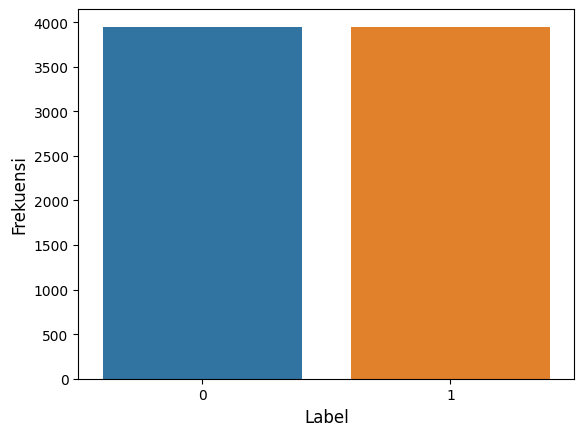

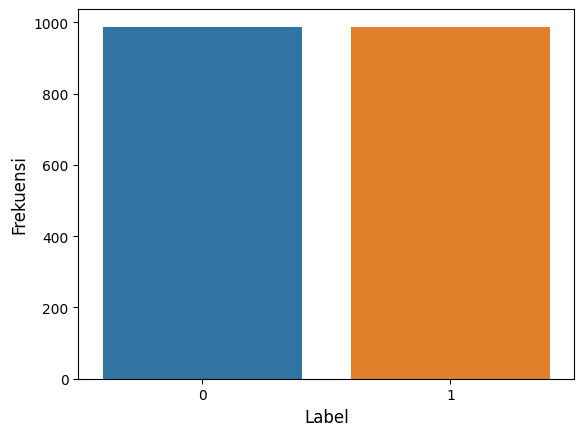

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#Pembagian Data
# Pembagian train (pelatihan) dan testing
Y = df_preprocessed["label"]
Y
print(Y.shape)
print(X.shape)

# One hot encoding label
import seaborn as sns
Y = to_categorical(Y, num_classes= 2)
Y
# split in train and test 80:20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, stratify=Y, random_state=14)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
# grafik data training dan testing
sns.countplot(Y_train,label='count')
plt.ylabel('Frekuensi', fontsize=12)
plt.xlabel('Label', fontsize=12)
plt.show()
sns.countplot(Y_test,label='count')
plt.ylabel('Frekuensi', fontsize=12)
plt.xlabel('Label', fontsize=12)
plt.show()


# **LEARNING RATE **

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import random

# Hyperparameters range
learning_rate_range = [0.0001, 0.001, 0.01, 0.1]

# Callbacks
early_stopping = EarlyStopping(patience=5, monitor='val_accuracy', mode='max', verbose=1, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_1.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

# Callbacks list
callbacks_list = [early_stopping, model_checkpoint]

#Build Model
def create_model(learning_rate):
    model = Sequential()
    model.add(Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False))
    model.add(Bidirectional(GRU(16)))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Tentukan jumlah percobaan yang ingin Anda lakukan
num_trials = 1

# Loop melalui setiap learning rate
for lr in learning_rate_range:
    for _ in range(num_trials):
        # Buat model baru untuk setiap iterasi
        model = create_model(lr)

        # Pelatihan model
        HistoryBiGRU = model.fit(X_train, Y_train, batch_size=64, epochs=100, validation_data=(X_test, Y_test), callbacks=callbacks_list)

        val_accuracy = HistoryBiGRU.history['val_accuracy'][-1]

        print(f"Trial {_ + 1} Hyperparameters:")
        print(f"Learning Rate: {lr}")
        print("\n")


Epoch 1/100
61/62 [============================>.] - ETA: 0s - loss: 0.6938 - accuracy: 0.4839
Epoch 1: val_accuracy improved from -inf to 0.52126, saving model to best_model_1.h5
62/62 [==============================] - 9s 57ms/step - loss: 0.6938 - accuracy: 0.4843 - val_loss: 0.6929 - val_accuracy: 0.5213
Epoch 2/100
62/62 [==============================] - ETA: 0s - loss: 0.6918 - accuracy: 0.5395
Epoch 2: val_accuracy improved from 0.52126 to 0.60931, saving model to best_model_1.h5
62/62 [==============================] - 3s 43ms/step - loss: 0.6918 - accuracy: 0.5395 - val_loss: 0.6899 - val_accuracy: 0.6093
Epoch 3/100
62/62 [==============================] - ETA: 0s - loss: 0.6886 - accuracy: 0.6068
Epoch 3: val_accuracy improved from 0.60931 to 0.69534, saving model to best_model_1.h5
62/62 [==============================] - 4s 62ms/step - loss: 0.6886 - accuracy: 0.6068 - val_loss: 0.6853 - val_accuracy: 0.6953
Epoch 4/100
61/62 [============================>.] - ETA: 0s - l

# **Neurons**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import random

# Hyperparameters range
neurons = [8, 16,32, 64, 128]

# Randomly select hyperparameters

def create_model(neurons):
    model = Sequential()
    model.add(Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False))
    model.add(Bidirectional(GRU(neurons)))
    model.add(Dropout(0.5))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))

    optimizer = Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Tentukan jumlah percobaan yang ingin Anda lakukan
num_trials = 1

# Tentukan nama file untuk menyimpan model terbaik
model_checkpoint = ModelCheckpoint('best_model_1.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

# Gunakan EarlyStopping untuk menghentikan pelatihan saat tidak ada peningkatan dalam metrik yang dipantau
early_stopping = EarlyStopping(patience=5 ,monitor='val_accuracy', mode='max', verbose=1, restore_best_weights=True)

# Callbacks list yang berisi kedua callback
callbacks_list = [early_stopping, model_checkpoint]

# Callbacks list yang berisi kedua callback

for n in neurons:  # Loop melalui setiap dropout rate
    best_accuracy = 0
    best_model = None

    for _ in range(num_trials):
        # Di sini Anda perlu membuat model baru untuk setiap iterasi
        model = create_model(n)

        # Pelatihan model
        HistoryBiGRU = model.fit(X_train, Y_train, batch_size=64, epochs=100, validation_data=(X_test, Y_test), callbacks=callbacks_list)

        val_accuracy = HistoryBiGRU.history['val_accuracy'][-1]

        print(f"Trial {_ + 1} Hyperparameters:")
        print(f"Neurons: {n}")
        print("\n")


Epoch 1/100
61/62 [============================>.] - ETA: 0s - loss: 0.5978 - accuracy: 0.6698
Epoch 1: val_accuracy improved from -inf to 0.81680, saving model to best_model_1.h5
62/62 [==============================] - 8s 57ms/step - loss: 0.5977 - accuracy: 0.6714 - val_loss: 0.4312 - val_accuracy: 0.8168
Epoch 2/100
61/62 [============================>.] - ETA: 0s - loss: 0.4625 - accuracy: 0.7925
Epoch 2: val_accuracy did not improve from 0.81680
62/62 [==============================] - 3s 52ms/step - loss: 0.4602 - accuracy: 0.7942 - val_loss: 0.3958 - val_accuracy: 0.8168
Epoch 3/100
61/62 [============================>.] - ETA: 0s - loss: 0.4258 - accuracy: 0.8061
Epoch 3: val_accuracy improved from 0.81680 to 0.81883, saving model to best_model_1.h5
62/62 [==============================] - 2s 36ms/step - loss: 0.4251 - accuracy: 0.8063 - val_loss: 0.3924 - val_accuracy: 0.8188
Epoch 4/100
61/62 [============================>.] - ETA: 0s - loss: 0.3958 - accuracy: 0.8263
Epoch 

# **Dropout 1**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import random

# Hyperparameters range
dropout_rate = [0.2, 0.3, 0.4, 0.5, 0.6]

# Randomly select hyperparameters

def create_model(dropout):
    model = Sequential()
    model.add(Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False))
    model.add(Bidirectional(GRU(32)))
    model.add(Dropout(dropout))
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))

    optimizer = Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Tentukan jumlah percobaan yang ingin Anda lakukan
num_trials = 1

# Tentukan nama file untuk menyimpan model terbaik
model_checkpoint = ModelCheckpoint('best_model_1.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

# Gunakan EarlyStopping untuk menghentikan pelatihan saat tidak ada peningkatan dalam metrik yang dipantau
early_stopping = EarlyStopping(patience=2, monitor='val_accuracy', mode='max', verbose=1, restore_best_weights=True)

# Callbacks list yang berisi kedua callback
callbacks_list = [early_stopping, model_checkpoint]

# Callbacks list yang berisi kedua callback

for do in dropout_rate:  # Loop melalui setiap dropout rate
    best_accuracy = 0
    best_model = None

    for _ in range(num_trials):
        # Di sini Anda perlu membuat model baru untuk setiap iterasi
        model = create_model(do)

        # Pelatihan model
        HistoryBiGRU = model.fit(X_train, Y_train, batch_size=64, epochs=10, validation_data=(X_test, Y_test), callbacks=callbacks_list)

        val_accuracy = HistoryBiGRU.history['val_accuracy'][-1]

        print(f"Trial {_ + 1} Hyperparameters:")
        print(f"Dropout 1: {do}")
        print("\n")


Epoch 1/10
62/62 [==============================] - ETA: 0s - loss: 0.5288 - accuracy: 0.7423
Epoch 1: val_accuracy improved from -inf to 0.80162, saving model to best_model_1.h5
62/62 [==============================] - 10s 72ms/step - loss: 0.5288 - accuracy: 0.7423 - val_loss: 0.4277 - val_accuracy: 0.8016
Epoch 2/10
62/62 [==============================] - ETA: 0s - loss: 0.4147 - accuracy: 0.8261
Epoch 2: val_accuracy improved from 0.80162 to 0.81984, saving model to best_model_1.h5
62/62 [==============================] - 4s 71ms/step - loss: 0.4147 - accuracy: 0.8261 - val_loss: 0.3973 - val_accuracy: 0.8198
Epoch 3/10
61/62 [============================>.] - ETA: 0s - loss: 0.3841 - accuracy: 0.8343
Epoch 3: val_accuracy improved from 0.81984 to 0.82794, saving model to best_model_1.h5
62/62 [==============================] - 4s 68ms/step - loss: 0.3840 - accuracy: 0.8347 - val_loss: 0.3718 - val_accuracy: 0.8279
Epoch 4/10
61/62 [============================>.] - ETA: 0s - loss

# **Dense Dim 1**


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import random

# Hyperparameters range
dense_dim = [8,16,32,64,128,512]

# Randomly select hyperparameters

def create_model(dense_1):
    model = Sequential()
    model.add(Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False))
    model.add(Bidirectional(GRU(32)))
    model.add(Dropout(0.5))
    model.add(Dense(dense_1, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))

    optimizer = Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Tentukan jumlah percobaan yang ingin Anda lakukan
num_trials = 1

# Tentukan nama file untuk menyimpan model terbaik
model_checkpoint = ModelCheckpoint('best_model_1.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

# Gunakan EarlyStopping untuk menghentikan pelatihan saat tidak ada peningkatan dalam metrik yang dipantau
early_stopping = EarlyStopping(patience=5, monitor='val_accuracy', mode='max', verbose=1, restore_best_weights=True)

# Callbacks list yang berisi kedua callback
callbacks_list = [early_stopping, model_checkpoint]

# Callbacks list yang berisi kedua callback

for den_1 in dense_dim:  # Loop melalui setiap dropout rate
    best_accuracy = 0
    best_model = None

    for _ in range(num_trials):
        # Di sini Anda perlu membuat model baru untuk setiap iterasi
        model = create_model(n)

        # Pelatihan model
        HistoryBiGRU = model.fit(X_train, Y_train, batch_size=64, epochs=100, validation_data=(X_test, Y_test), callbacks=callbacks_list)

        val_accuracy = HistoryBiGRU.history['val_accuracy'][-1]

        print(f"Trial {_ + 1} Hyperparameters:")
        print(f"dense_Dim_1: {den_1}")
        print("\n")


Epoch 1/100
62/62 [==============================] - ETA: 0s - loss: 0.5130 - accuracy: 0.7486
Epoch 1: val_accuracy improved from -inf to 0.82287, saving model to best_model_1.h5
62/62 [==============================] - 10s 97ms/step - loss: 0.5130 - accuracy: 0.7486 - val_loss: 0.4030 - val_accuracy: 0.8229
Epoch 2/100
62/62 [==============================] - ETA: 0s - loss: 0.4011 - accuracy: 0.8243
Epoch 2: val_accuracy improved from 0.82287 to 0.82692, saving model to best_model_1.h5
62/62 [==============================] - 3s 53ms/step - loss: 0.4011 - accuracy: 0.8243 - val_loss: 0.3892 - val_accuracy: 0.8269
Epoch 3/100
62/62 [==============================] - ETA: 0s - loss: 0.3602 - accuracy: 0.8446
Epoch 3: val_accuracy improved from 0.82692 to 0.84008, saving model to best_model_1.h5
62/62 [==============================] - 3s 53ms/step - loss: 0.3602 - accuracy: 0.8446 - val_loss: 0.3737 - val_accuracy: 0.8401
Epoch 4/100
62/62 [==============================] - ETA: 0s - 

# **Dropoout_2**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import random

# Hyperparameters range
dropout_rate = [0.2, 0.3, 0.4, 0.5, 0.6]

# Randomly select hyperparameters

def create_model(dropout_2):
    model = Sequential()
    model.add(Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False))
    model.add(Bidirectional(GRU(32)))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(dropout_2))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))

    optimizer = Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Tentukan jumlah percobaan yang ingin Anda lakukan
num_trials = 1

# Tentukan nama file untuk menyimpan model terbaik
model_checkpoint = ModelCheckpoint('best_model_1.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

# Gunakan EarlyStopping untuk menghentikan pelatihan saat tidak ada peningkatan dalam metrik yang dipantau
early_stopping = EarlyStopping(patience=5, monitor='val_accuracy', mode='max', verbose=1, restore_best_weights=True)

# Callbacks list yang berisi kedua callback
callbacks_list = [early_stopping, model_checkpoint]

# Callbacks list yang berisi kedua callback

for do_2 in dropout_rate:  # Loop melalui setiap dropout rate
    best_accuracy = 0
    best_model = None

    for _ in range(num_trials):
        # Di sini Anda perlu membuat model baru untuk setiap iterasi
        model = create_model(do)

        # Pelatihan model
        HistoryBiGRU = model.fit(X_train, Y_train, batch_size=64, epochs=100, validation_data=(X_test, Y_test), callbacks=callbacks_list)

        val_accuracy = HistoryBiGRU.history['val_accuracy'][-1]

        print(f"Trial {_ + 1} Hyperparameters:")
        print(f"Dropout 2: {do_2}")
        print("\n")


Epoch 1/100
61/62 [============================>.] - ETA: 0s - loss: 0.5627 - accuracy: 0.7054
Epoch 1: val_accuracy improved from -inf to 0.80668, saving model to best_model_1.h5
62/62 [==============================] - 21s 76ms/step - loss: 0.5619 - accuracy: 0.7066 - val_loss: 0.4212 - val_accuracy: 0.8067
Epoch 2/100
61/62 [============================>.] - ETA: 0s - loss: 0.4270 - accuracy: 0.8166
Epoch 2: val_accuracy improved from 0.80668 to 0.81073, saving model to best_model_1.h5
62/62 [==============================] - 5s 85ms/step - loss: 0.4275 - accuracy: 0.8162 - val_loss: 0.4058 - val_accuracy: 0.8107
Epoch 3/100
61/62 [============================>.] - ETA: 0s - loss: 0.4030 - accuracy: 0.8271
Epoch 3: val_accuracy improved from 0.81073 to 0.82895, saving model to best_model_1.h5
62/62 [==============================] - 4s 60ms/step - loss: 0.4020 - accuracy: 0.8271 - val_loss: 0.3850 - val_accuracy: 0.8289
Epoch 4/100
62/62 [==============================] - ETA: 0s - 

# **Dense Dim 2**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import random

# Hyperparameters range
dense_dim = [8,16,32,64,128,512]

# Randomly select hyperparameters

def create_model(dense_2):
    model = Sequential()
    model.add(Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False))
    model.add(Bidirectional(GRU(32)))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(dense_2, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))

    optimizer = Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Tentukan jumlah percobaan yang ingin Anda lakukan
num_trials = 1

# Tentukan nama file untuk menyimpan model terbaik
model_checkpoint = ModelCheckpoint('best_model_1.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

# Gunakan EarlyStopping untuk menghentikan pelatihan saat tidak ada peningkatan dalam metrik yang dipantau
early_stopping = EarlyStopping(patience=5, monitor='val_accuracy', mode='max', verbose=1, restore_best_weights=True)

# Callbacks list yang berisi kedua callback
callbacks_list = [early_stopping, model_checkpoint]

# Callbacks list yang berisi kedua callback

for den_2 in dense_dim:  # Loop melalui setiap dropout rate
    best_accuracy = 0
    best_model = None

    for _ in range(num_trials):
        # Di sini Anda perlu membuat model baru untuk setiap iterasi
        model = create_model(n)

        # Pelatihan model
        HistoryBiGRU = model.fit(X_train, Y_train, batch_size=64, epochs=100, validation_data=(X_test, Y_test), callbacks=callbacks_list)

        val_accuracy = HistoryBiGRU.history['val_accuracy'][-1]

        print(f"Trial {_ + 1} Hyperparameters:")
        print(f"dense_Dim_2: {den_2}")
        print("\n")


Epoch 1/100
61/62 [============================>.] - ETA: 0s - loss: 0.5150 - accuracy: 0.7441
Epoch 1: val_accuracy improved from -inf to 0.82389, saving model to best_model_1.h5
62/62 [==============================] - 12s 88ms/step - loss: 0.5135 - accuracy: 0.7456 - val_loss: 0.4168 - val_accuracy: 0.8239
Epoch 2/100
 1/62 [..............................] - ETA: 5s - loss: 0.4838 - accuracy: 0.7812

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


62/62 [==============================] - ETA: 0s - loss: 0.4180 - accuracy: 0.8162
Epoch 2: val_accuracy improved from 0.82389 to 0.82895, saving model to best_model_1.h5
62/62 [==============================] - 5s 76ms/step - loss: 0.4180 - accuracy: 0.8162 - val_loss: 0.3949 - val_accuracy: 0.8289
Epoch 3/100
61/62 [============================>.] - ETA: 0s - loss: 0.3776 - accuracy: 0.8335
Epoch 3: val_accuracy improved from 0.82895 to 0.83704, saving model to best_model_1.h5
62/62 [==============================] - 4s 58ms/step - loss: 0.3804 - accuracy: 0.8322 - val_loss: 0.3635 - val_accuracy: 0.8370
Epoch 4/100
61/62 [============================>.] - ETA: 0s - loss: 0.3589 - accuracy: 0.8432
Epoch 4: val_accuracy did not improve from 0.83704
62/62 [==============================] - 3s 55ms/step - loss: 0.3601 - accuracy: 0.8428 - val_loss: 0.3861 - val_accuracy: 0.8300
Epoch 5/100
61/62 [============================>.] - ETA: 0s - loss: 0.3440 - accuracy: 0.8530
Epoch 5: val_ac

# **batch size**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import random

# Hyperparameters range
batch_size = [8, 16, 32, 64]

# Randomly select hyperparameters

def create_model(batch_size):
    model = Sequential()
    model.add(Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False))
    model.add(Bidirectional(GRU(32)))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Tentukan jumlah percobaan yang ingin Anda lakukan
num_trials = 1

# Tentukan nama file untuk menyimpan model terbaik
model_checkpoint = ModelCheckpoint('best_model_1.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

# Gunakan EarlyStopping untuk menghentikan pelatihan saat tidak ada peningkatan dalam metrik yang dipantau
early_stopping = EarlyStopping(patience=5, monitor='val_accuracy', mode='max', verbose=1, restore_best_weights=True)

# Callbacks list yang berisi kedua callback
callbacks_list = [early_stopping, model_checkpoint]

# Callbacks list yang berisi kedua callback

for bs in batch_size:  # Loop melalui setiap dropout rate
    best_accuracy = 0
    best_model = None

    for _ in range(num_trials):
        # Di sini Anda perlu membuat model baru untuk setiap iterasi
        model = create_model(bs)

        # Pelatihan model
        HistoryBiGRU = model.fit(X_train, Y_train, batch_size=bs, epochs=100, validation_data=(X_test, Y_test), callbacks=callbacks_list)

        val_accuracy = HistoryBiGRU.history['val_accuracy'][-1]

        print(f"Trial {_ + 1} Hyperparameters:")
        print(f"batch_size: {bs}")
        print("\n")


Epoch 1/100
493/494 [============================>.] - ETA: 0s - loss: 0.4899 - accuracy: 0.7761
Epoch 1: val_accuracy improved from -inf to 0.82389, saving model to best_model_1.h5
494/494 [==============================] - 22s 33ms/step - loss: 0.4895 - accuracy: 0.7765 - val_loss: 0.3949 - val_accuracy: 0.8239
Epoch 2/100
494/494 [==============================] - ETA: 0s - loss: 0.4043 - accuracy: 0.8281
Epoch 2: val_accuracy improved from 0.82389 to 0.83907, saving model to best_model_1.h5
494/494 [==============================] - 15s 30ms/step - loss: 0.4043 - accuracy: 0.8281 - val_loss: 0.3724 - val_accuracy: 0.8391
Epoch 3/100
493/494 [============================>.] - ETA: 0s - loss: 0.3771 - accuracy: 0.8309
Epoch 3: val_accuracy did not improve from 0.83907
494/494 [==============================] - 18s 36ms/step - loss: 0.3772 - accuracy: 0.8306 - val_loss: 0.3991 - val_accuracy: 0.8300
Epoch 4/100
493/494 [============================>.] - ETA: 0s - loss: 0.3599 - accura

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dropout, BatchNormalization, Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# Definisi model di luar fungsi
model_2 = Sequential()
model_2.add(Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False))
model_2.add(Bidirectional(GRU(32)))
model_2.add(Dropout(0.5))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dropout(0.4))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(2, activation='sigmoid'))

optimizer = Adam(learning_rate=0.01)
model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

def create_model_2():
    return model_2

# Tentukan nama file untuk menyimpan model_2 terbaik
model_2_checkpoint = ModelCheckpoint('best_model_6.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)

# Gunakan EarlyStopping untuk menghentikan pelatihan saat tidak ada peningkatan dalam metrik yang dipantau
early_stopping = EarlyStopping(patience=10, monitor='val_accuracy', mode='max', verbose=1, restore_best_weights=True)

# Callbacks list yang berisi kedua callback
callbacks_list = [early_stopping, model_2_checkpoint]

# Pemanggilan fungsi create_model_2() untuk mendapatkan model_2
model_2 = create_model_2()

# Pastikan Anda telah mendefinisikan X_train, Y_train, X_test, dan Y_test sebelumnya

HistoryBiGRU = model_2.fit(X_train, Y_train, batch_size=64, epochs=50, validation_data=(X_test, Y_test), callbacks=callbacks_list)

val_accuracy = HistoryBiGRU.history['val_accuracy'][-1]


Epoch 1/50
61/62 [============================>.] - ETA: 0s - loss: 0.5411 - accuracy: 0.7106
Epoch 1: val_accuracy improved from -inf to 0.81579, saving model to best_model_6.h5
62/62 [==============================] - 10s 81ms/step - loss: 0.5404 - accuracy: 0.7116 - val_loss: 0.4069 - val_accuracy: 0.8158
Epoch 2/50
 2/62 [..............................] - ETA: 3s - loss: 0.4887 - accuracy: 0.8125

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


61/62 [============================>.] - ETA: 0s - loss: 0.4199 - accuracy: 0.8238
Epoch 2: val_accuracy did not improve from 0.81579
62/62 [==============================] - 5s 88ms/step - loss: 0.4193 - accuracy: 0.8235 - val_loss: 0.4021 - val_accuracy: 0.8138
Epoch 3/50
61/62 [============================>.] - ETA: 0s - loss: 0.3803 - accuracy: 0.8312
Epoch 3: val_accuracy improved from 0.81579 to 0.83704, saving model to best_model_6.h5
62/62 [==============================] - 4s 68ms/step - loss: 0.3806 - accuracy: 0.8316 - val_loss: 0.3927 - val_accuracy: 0.8370
Epoch 4/50
61/62 [============================>.] - ETA: 0s - loss: 0.3629 - accuracy: 0.8402
Epoch 4: val_accuracy did not improve from 0.83704
62/62 [==============================] - 4s 66ms/step - loss: 0.3631 - accuracy: 0.8400 - val_loss: 0.3603 - val_accuracy: 0.8370
Epoch 5/50
62/62 [==============================] - ETA: 0s - loss: 0.3392 - accuracy: 0.8575
Epoch 5: val_accuracy improved from 0.83704 to 0.84514,

In [ ]:
# from tensorflow.keras.models import save_model

# # Simpan model ke Google Drive
# model_path = '/content/drive/MyDrive/Skripsi/model_skripsi/best_model6/'
# save_model(best_model, model_path)

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/best_model_6.h5')


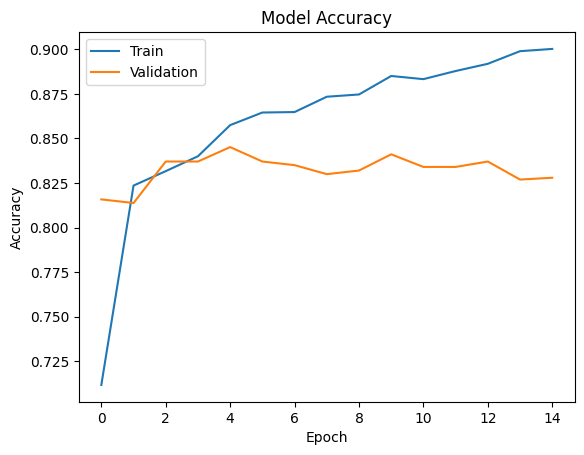

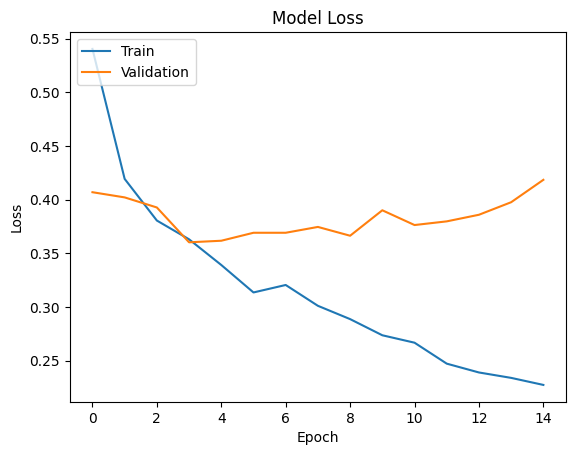

In [ ]:
import matplotlib.pyplot as plt

# Plot akurasi pelatihan dan validasi
plt.plot(HistoryBiGRU.history['accuracy'])
plt.plot(HistoryBiGRU.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss pelatihan dan validasi
plt.plot(HistoryBiGRU.history['loss'])
plt.plot(HistoryBiGRU.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
# prediksi classes untuk data test
from sklearn.metrics import confusion_matrix, classification_report



y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)
print(classification_report(y_true, y_pred))
print(classification_report(y_true, y_pred, digits=4, output_dict=False))
report = classification_report(y_true, y_pred,
digits=4, output_dict=False)


31/31 [==============================] - 1s 39ms/step
[[414  96]
 [ 57 421]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.84       510
           1       0.81      0.88      0.85       478

    accuracy                           0.85       988
   macro avg       0.85      0.85      0.85       988
weighted avg       0.85      0.85      0.85       988

              precision    recall  f1-score   support

           0     0.8790    0.8118    0.8440       510
           1     0.8143    0.8808    0.8462       478

    accuracy                         0.8451       988
   macro avg     0.8466    0.8463    0.8451       988
weighted avg     0.8477    0.8451    0.8451       988



31/31 [==============================] - 1s 25ms/step


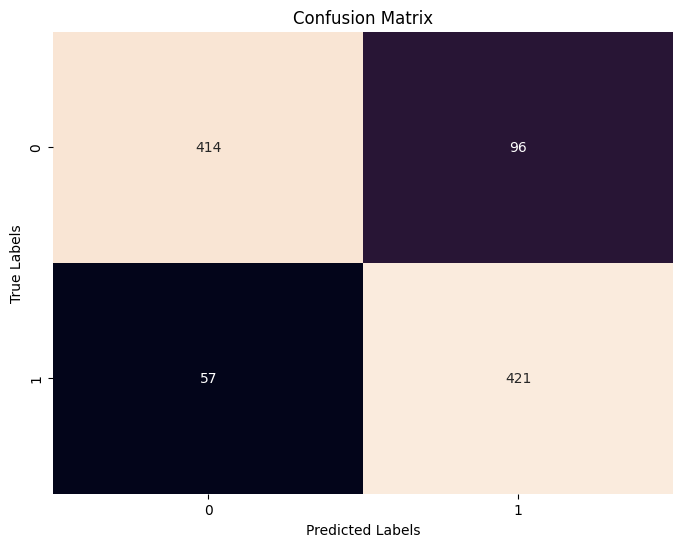

In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred_classes)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# **PREDIKSI DATA BARU**





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

file_prediksi=pd.read_excel('/content/data_baru_klasifikasi.xlsx')
file_prediksi

,textDisplay
0,sekitaran jalan ciwastra banyak ngambay kabeln...
1,saya kebetulan jalan area depanseberang hotel ...
2,perumahan riung bandung kabel banyak melintang
3,alhamdulilah makin semangat liat antusias warg...
4,alhamdulilah mulai bangkit ekonomi warga bandung
...,...
2613,gila sumpah demi apapun keren banget neng yura
2614,greget yura surprise tiap perform pdhl yutub
2615,yura banga karena teteh selalu melestaraikan b...
2616,gelo merinding ajig pride yura nuhun sabandungeun


In [ ]:
#Case Folding
file_prediksi['textDisplay'] = file_prediksi['textDisplay'].str.lower()
print('Case Folding Result : \n')
print(file_prediksi['textDisplay'].head(5))
print('\n\n\n')

Case Folding Result : 

0    sekitaran jalan ciwastra banyak ngambay kabeln...
1    saya kebetulan jalan area depanseberang hotel ...
2       perumahan riung bandung kabel banyak melintang
3    alhamdulilah makin semangat liat antusias warg...
4     alhamdulilah mulai bangkit ekonomi warga bandung
Name: textDisplay, dtype: object






In [ ]:
import string, re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#Tokenizing
def remove_comments_special(text):
    #menghapus karakter khusus dalam teks, seperti tab, newline, dan backslash
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\'," ").replace('.'," ").replace(','," ")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
file_prediksi['textDisplay'] = file_prediksi['textDisplay'].apply(remove_comments_special)

#menghapus angka dalam teks dengan menggunakan regular expression
def remove_number(text):
    return  re.sub(r"\d+", " ", text)
file_prediksi['textDisplay'] = file_prediksi['textDisplay'].apply(remove_number)
#menghapus emotikon dari teks menggunakan regular expression
def remove_emoticons(text):
    emoticon_pattern = re.compile("["
                                 u"\U0001F600-\U0001F64F"  # emoticons
                                 u"\U0001F300-\U0001F5FF"  # simbol & piktogram
                                 u"\U0001F680-\U0001F6FF"  # transportasi & simbol peralatan
                                 u"\U0001F1E0-\U0001F1FF"  # bendera negara
                                 u"\U00002702-\U000027B0"  # simbol lainnya
                                 u"\U000024C2-\U0001F251"
                                 "]+", flags=re.UNICODE)
    return emoticon_pattern.sub(r'', text)
file_prediksi['textDisplay'] = file_prediksi['textDisplay'].apply(remove_emoticons)
#file_prediksi['review'] = file_prediksi['review'].apply(remove_number)
def remove_punctuation(text):
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator).replace(",", " ")
file_prediksi['textDisplay'] = file_prediksi['textDisplay'].apply(remove_punctuation)
# menghapus spasi yang ada di awal dan akhir teks menggunakan str.strip()
def remove_whitespace_LT(text):
    return text.strip()
file_prediksi['textDisplay'] = file_prediksi['textDisplay'].apply(remove_whitespace_LT)
#menghapus spasi berlebih dalam teks dengan menggantinya dengan satu spasi menggunakan regular expression
def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text)
file_prediksi['textDisplay'] = file_prediksi['textDisplay'].apply(remove_extra_spaces)
#mengganti multiple whitespace (spasi berturut-turut) dengan satu spasi menggunakan regular expression
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)
file_prediksi['textDisplay'] = file_prediksi['textDisplay'].apply(remove_whitespace_multiple)
#menghapus huruf yang berulang dalam teks
def remove_repeated_letters(text):
    return re.sub(r"(.)\1+", r"\1", text)
file_prediksi['textDisplay'] = file_prediksi['textDisplay'].apply(remove_repeated_letters)

def filter_length(text):
    # Menghapus kata-kata yang kurang dari 4 karakter atau lebih dari 20 karakter
    text_filtered = ' '.join(word for word in re.split(r'\s', text) if 3 < len(word) < 26)
    return text_filtered
file_prediksi['textDisplay'] = file_prediksi['textDisplay'].apply(filter_length)

#mengubah textDisplay menjadi token
def word_tokenize_wrapper(text):
    return word_tokenize(text)
file_prediksi['comments_tokens'] = file_prediksi['textDisplay'].apply(word_tokenize_wrapper)
print('Tokenizing Result : \n')
print(file_prediksi['comments_tokens'].head())
print('\n\n\n')


Tokenizing Result : 

0    [sekitaran, jalan, ciwastra, banyak, ngambay, ...
1    [saya, kebetulan, jalan, area, depanseberang, ...
2    [perumahan, riung, bandung, kabel, banyak, mel...
3    [alhamdulilah, makin, semangat, liat, antusias...
4    [alhamdulilah, mulai, bangkit, ekonomi, warga,...
Name: comments_tokens, dtype: object






In [ ]:
file_prediksi

,textDisplay,comments_tokens
0,sekitaran jalan ciwastra banyak ngambay kabeln...,"[sekitaran, jalan, ciwastra, banyak, ngambay, ..."
1,saya kebetulan jalan area depanseberang hotel ...,"[saya, kebetulan, jalan, area, depanseberang, ..."
2,perumahan riung bandung kabel banyak melintang,"[perumahan, riung, bandung, kabel, banyak, mel..."
3,alhamdulilah makin semangat liat antusias warg...,"[alhamdulilah, makin, semangat, liat, antusias..."
4,alhamdulilah mulai bangkit ekonomi warga bandung,"[alhamdulilah, mulai, bangkit, ekonomi, warga,..."
...,...,...
2613,gila sumpah demi apapun keren banget neng yura,"[gila, sumpah, demi, apapun, keren, banget, ne..."
2614,greget yura surprise tiap perform pdhl yutub,"[greget, yura, surprise, tiap, perform, pdhl, ..."
2615,yura banga karena teteh selalu melestaraikan b...,"[yura, banga, karena, teteh, selalu, melestara..."
2616,gelo merinding ajig pride yura nuhun sabandungeun,"[gelo, merinding, ajig, pride, yura, nuhun, sa..."


In [ ]:
#Spelling Normalization
normalizad_word = pd.read_csv("https://raw.githubusercontent.com/meisaputri21/Indonesian-Twitter-Emotion-Dataset/master/kamus_singkatan.csv", sep=";", header=None)
normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1]

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]
file_prediksi['comments_normalized'] = file_prediksi['comments_tokens'].apply(normalized_term)

normalizad_word2 = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vRQS3tlUL5EcxYqbbYzFLHmHaqm2npjY-DLyz0dzwMIcUVhfoVWKuhR52P9YCqbAyY9zCgT66JVutWA/pub?output=csv",header=None)
normalizad_word_dict2 = {}

for index, row in normalizad_word2.iterrows():
    if row[0] not in normalizad_word_dict2:
        normalizad_word_dict2[row[0]] = row[1]
def normalized_term2(document):
    return [normalizad_word_dict2[term] if term in normalizad_word_dict2 else term for term in document]
file_prediksi['comments_normalized'] = file_prediksi['comments_normalized'].apply(normalized_term2)

In [ ]:
#menyatukan kembali tokenizer menjadi kalimat
def detokenize(token_list):
    # Menggabungkan token dengan spasi sebagai pemisah
    text = ' '.join(token_list)
    return text

file_prediksi['comments_join'] = file_prediksi['comments_normalized'].apply(detokenize)

print(file_prediksi)

                                            textDisplay  \
0     sekitaran jalan ciwastra banyak ngambay kabeln...   
1     saya kebetulan jalan area depanseberang hotel ...   
2        perumahan riung bandung kabel banyak melintang   
3     alhamdulilah makin semangat liat antusias warg...   
4      alhamdulilah mulai bangkit ekonomi warga bandung   
...                                                 ...   
2613     gila sumpah demi apapun keren banget neng yura   
2614       greget yura surprise tiap perform pdhl yutub   
2615  yura banga karena teteh selalu melestaraikan b...   
2616  gelo merinding ajig pride yura nuhun sabandungeun   
2617  banyak jempol akan bisa mengeskpresikan betapa...   

                                        comments_tokens  \
0     [sekitaran, jalan, ciwastra, banyak, ngambay, ...   
1     [saya, kebetulan, jalan, area, depanseberang, ...   
2     [perumahan, riung, bandung, kabel, banyak, mel...   
3     [alhamdulilah, makin, semangat, liat, antusias...

In [ ]:
# menghapus spasi yang ada di awal dan akhir teks menggunakan str.strip()
def remove_whitespace_LT(text):
    return text.strip()
file_prediksi['comments_join'] = file_prediksi['comments_join'].apply(remove_whitespace_LT)
#menghapus spasi berlebih dalam teks dengan menggantinya dengan satu spasi menggunakan regular expression
def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text)
file_prediksi['comments_join'] = file_prediksi['comments_join'].apply(remove_extra_spaces)
#mengganti multiple whitespace (spasi berturut-turut) dengan satu spasi menggunakan regular expression
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)
file_prediksi['comments_join'] = file_prediksi['comments_join'].apply(remove_whitespace_multiple)

#mengubah kalimat menjadi token
def word_tokenize_wrapper(text):
    return word_tokenize(text)
file_prediksi['comments_tokens_final'] = file_prediksi['comments_join'].apply(word_tokenize_wrapper)
print('Tokenizing Result : \n')
print(file_prediksi['comments_tokens_final'].head())
print('\n\n\n')


Tokenizing Result : 

0    [sekitaran, jalan, ciwastra, banyak, ngambay, ...
1    [saya, kebetulan, jalan, area, depanseberang, ...
2    [perumahan, riung, bandung, kabel, banyak, mel...
3    [alhamdulilah, makin, semangat, lihat, antusia...
4    [alhamdulilah, mulai, bangkit, ekonomi, warga,...
Name: comments_tokens_final, dtype: object






In [ ]:
#Stopword Removal
import pandas as pd

file_path = '/content/drive/MyDrive/Skripsi/data_skripsi/stop word indo (3).txt'  # Ganti dengan jalur file yang sesuai

# Baca isi file teks ke dalam list
with open(file_path, 'r') as file:
    lines = file.readlines()

# Mengubah setiap baris menjadi string dengan kutipan ganda
formatted_lines = ['"' + line.strip() + '"' for line in lines]

# Menggabungkan baris-baris menjadi satu string dengan koma sebagai pemisah
formatted_text = ", ".join(formatted_lines)

print(formatted_text)

# List kata stopwords
stopwords_list = formatted_text
def stopwords_removal(words):
    return [word for word in words if word not in stopwords_list]


file_prediksi['comments_tokens_final'] = file_prediksi['comments_tokens_final'].apply(stopwords_removal)
file_prediksi.head(100)

"ada", "adalah", "adanya", "adapun", "agak", "agaknya", "agar", "akan", "akankah", "akhir", "akhiri", "akhirnya", "aku", "akulah", "amat", "amatlah", "anda", "andalah", "antar", "antara", "antaranya", "apa", "apaan", "apabila", "apakah", "apalagi", "apatah", "artinya", "asal", "asalkan", "atas", "atau", "ataukah", "ataupun", "awal", "awalnya", "bagai", "bagaikan", "bagaimana", "bagaimanakah", "bagaimanapun", "bagi", "bagian", "bahkan", "bahwa", "bahwasanya", "baik", "bakal", "bakalan", "balik", "bandung", "bang", "banyak", "bapak", "baru", "bawah", "bdg", "beberapa", "begini", "beginian", "beginikah", "beginilah", "begitu", "begitukah", "begitulah", "begitupun", "bekerja", "belakang", "belakangan", "belum", "belumlah", "benar", "benarkah", "benarlah", "berada", "berakhir", "berakhirlah", "berakhirnya", "berapa", "berapakah", "berapalah", "berapapun", "berarti", "berawal", "berbagai", "berdatangan", "beri", "berikan", "berikut", "berikutnya", "berjumlah", "berkali-kali", "berkata", "ber

,textDisplay,comments_tokens,comments_normalized,comments_join,comments_tokens_final
0,sekitaran jalan ciwastra banyak ngambay kabeln...,"[sekitaran, jalan, ciwastra, banyak, ngambay, ...","[sekitaran, jalan, ciwastra, banyak, ngambay, ...",sekitaran jalan ciwastra banyak ngambay kabeln...,"[sekitaran, jalan, ciwastra, ngambay, kabelnya..."
1,saya kebetulan jalan area depanseberang hotel ...,"[saya, kebetulan, jalan, area, depanseberang, ...","[saya, kebetulan, jalan, area, depanseberang, ...",saya kebetulan jalan area depanseberang hotel ...,"[jalan, area, depanseberang, hotel, papandayan..."
2,perumahan riung bandung kabel banyak melintang,"[perumahan, riung, bandung, kabel, banyak, mel...","[perumahan, riung, bandung, kabel, banyak, mel...",perumahan riung bandung kabel banyak melintang,"[perumahan, riung, kabel, melintang]"
3,alhamdulilah makin semangat liat antusias warg...,"[alhamdulilah, makin, semangat, liat, antusias...","[alhamdulilah, makin, semangat, lihat, antusia...",alhamdulilah makin semangat lihat antusias war...,"[alhamdulilah, semangat, antusias, warga, menc..."
4,alhamdulilah mulai bangkit ekonomi warga bandung,"[alhamdulilah, mulai, bangkit, ekonomi, warga,...","[alhamdulilah, mulai, bangkit, ekonomi, warga,...",alhamdulilah mulai bangkit ekonomi warga bandung,"[alhamdulilah, bangkit, ekonomi, warga]"
...,...,...,...,...,...
95,semua warga bandung usahakan naik transpirtasi...,"[semua, warga, bandung, usahakan, naik, transp...","[semua, warga, bandung, usahakan, naik, transp...",semua warga bandung usahakan naik transpirtasi...,"[warga, usahakan, transpirtasi, bike, work, ko..."
96,masihan terang mending online langkung mirah p...,"[masihan, terang, mending, online, langkung, m...","[masihan, terang, lebih baik, online, langkung...",masihan terang lebih baik online langkung mira...,"[masihan, terang, online, langkung, mirah, psi..."
97,telat perpanjang bikin baru mahal pusing regul...,"[telat, perpanjang, bikin, baru, mahal, pusing...","[terlambat, perpanjang, buat, baru, mahal, pus...",terlambat perpanjang buat baru mahal pusing re...,"[terlambat, perpanjang, mahal, pusing, regulas..."
98,skrg tidak perpanjang masa masih perpanjang ku...,"[skrg, tidak, perpanjang, masa, masih, perpanj...","[sekarang , tidak, perpanjang, masa, masih, pe...",sekarang tidak perpanjang masa masih perpanjan...,"[perpanjang, perpanjang, kuat, kerajan, zaman,..."


In [ ]:
# file_prediksi.to_excel('/content/prediksi.xlsx', index=False)


In [ ]:
#Stemming
# import Sastrawi package
! pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
#stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)
term_dict = {}
for document in file_prediksi['comments_tokens_final']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
print(term_dict)
print("------------------------")
# apply stemmed term to file_prediksiframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

file_prediksi['comments_tokens_stemmed'] = file_prediksi['comments_tokens_final'].apply(get_stemmed_term)

# file_prediksi["Ulasan_clean"] = [' '.join(map(str, l)) for l in file_prediksi['comments_tokens_stemmed']]



Streaming output truncated to the last 5000 lines.
sekiya : sekiya
kebiasa : biasa
perjalananya : perjalananya
thinking : thinking
saranya : sara
sedara : dara
malu : malu
mencrong : mencrong
sesunyi : sunyi
banget : banget
tingalnya : tingalnya
baltos : baltos
ketemuan : ketemu
seharihari : seharihari
ojol : ojol
hapal : hapal
paruguh : paruguh
batas : batas
bunyikan : bunyi
bising : bising
melengking : lengking
dibawa : bawa
degdegan : degdegan
mati : mati
asyik : asyik
hayang : hayang
nyobian : nyobian
wayah : wayah
kuring : kuring
mamana : mamana
hangseur : hangseur
gerak : gerak
ribut : ribut
benerbener : benerbener
dilancarin : dilancarin
gate : gate
tertib : tertib
anjr : anjr
gojekmaxim : gojekmaxim
minggu : minggu
ngekost : ngekost
brisik : brisik
lamalama : lamalama
overproud : overproud
dimananya : mana
orok : orok
daerahdaerah : daerahdaerah
segitu : segitu
satupun : satu
nyalakan : nyala
ngetawain : ngetawain
lamou : lamou
logika : logika
nanaonan : nanaonan
ngerem : ngere

In [ ]:
#Stopword Removal
import pandas as pd

file_path = '/content/drive/MyDrive/Skripsi/data_skripsi/stop word indo (3).txt'  # Ganti dengan jalur file yang sesuai

# Baca isi file teks ke dalam list
with open(file_path, 'r') as file:
    lines = file.readlines()

# Mengubah setiap baris menjadi string dengan kutipan ganda
formatted_lines = ['"' + line.strip() + '"' for line in lines]

# Menggabungkan baris-baris menjadi satu string dengan koma sebagai pemisah
formatted_text = ", ".join(formatted_lines)

print(formatted_text)

# List kata stopwords
stopwords_list = formatted_text
def stopwords_removal(words):
    return [word for word in words if word not in stopwords_list]


file_prediksi['comments_tokens_stemmed'] = file_prediksi['comments_tokens_stemmed'].apply(stopwords_removal)
file_prediksi.head(100)

"ada", "adalah", "adanya", "adapun", "agak", "agaknya", "agar", "akan", "akankah", "akhir", "akhiri", "akhirnya", "aku", "akulah", "amat", "amatlah", "anda", "andalah", "antar", "antara", "antaranya", "apa", "apaan", "apabila", "apakah", "apalagi", "apatah", "artinya", "asal", "asalkan", "atas", "atau", "ataukah", "ataupun", "awal", "awalnya", "bagai", "bagaikan", "bagaimana", "bagaimanakah", "bagaimanapun", "bagi", "bagian", "bahkan", "bahwa", "bahwasanya", "baik", "bakal", "bakalan", "balik", "bandung", "bang", "banyak", "bapak", "baru", "bawah", "bdg", "beberapa", "begini", "beginian", "beginikah", "beginilah", "begitu", "begitukah", "begitulah", "begitupun", "bekerja", "belakang", "belakangan", "belum", "belumlah", "benar", "benarkah", "benarlah", "berada", "berakhir", "berakhirlah", "berakhirnya", "berapa", "berapakah", "berapalah", "berapapun", "berarti", "berawal", "berbagai", "berdatangan", "beri", "berikan", "berikut", "berikutnya", "berjumlah", "berkali-kali", "berkata", "ber

,textDisplay,comments_tokens,comments_normalized,comments_join,comments_tokens_final,comments_tokens_stemmed
0,sekitaran jalan ciwastra banyak ngambay kabeln...,"[sekitaran, jalan, ciwastra, banyak, ngambay, ...","[sekitaran, jalan, ciwastra, banyak, ngambay, ...",sekitaran jalan ciwastra banyak ngambay kabeln...,"[sekitaran, jalan, ciwastra, ngambay, kabelnya...","[jalan, ciwastra, ngambay, kabel, palaur]"
1,saya kebetulan jalan area depanseberang hotel ...,"[saya, kebetulan, jalan, area, depanseberang, ...","[saya, kebetulan, jalan, area, depanseberang, ...",saya kebetulan jalan area depanseberang hotel ...,"[jalan, area, depanseberang, hotel, papandayan...","[jalan, area, depanseberang, hotel, papandayan..."
2,perumahan riung bandung kabel banyak melintang,"[perumahan, riung, bandung, kabel, banyak, mel...","[perumahan, riung, bandung, kabel, banyak, mel...",perumahan riung bandung kabel banyak melintang,"[perumahan, riung, kabel, melintang]","[rumah, riung, kabel, lintang]"
3,alhamdulilah makin semangat liat antusias warg...,"[alhamdulilah, makin, semangat, liat, antusias...","[alhamdulilah, makin, semangat, lihat, antusia...",alhamdulilah makin semangat lihat antusias war...,"[alhamdulilah, semangat, antusias, warga, menc...","[alhamdulilah, semangat, antusias, warga, cint..."
4,alhamdulilah mulai bangkit ekonomi warga bandung,"[alhamdulilah, mulai, bangkit, ekonomi, warga,...","[alhamdulilah, mulai, bangkit, ekonomi, warga,...",alhamdulilah mulai bangkit ekonomi warga bandung,"[alhamdulilah, bangkit, ekonomi, warga]","[alhamdulilah, bangkit, ekonomi, warga]"
...,...,...,...,...,...,...
95,semua warga bandung usahakan naik transpirtasi...,"[semua, warga, bandung, usahakan, naik, transp...","[semua, warga, bandung, usahakan, naik, transp...",semua warga bandung usahakan naik transpirtasi...,"[warga, usahakan, transpirtasi, bike, work, ko...","[warga, usaha, transpirtasi, bike, work, kotab..."
96,masihan terang mending online langkung mirah p...,"[masihan, terang, mending, online, langkung, m...","[masihan, terang, lebih baik, online, langkung...",masihan terang lebih baik online langkung mira...,"[masihan, terang, online, langkung, mirah, psi...","[terang, online, langkung, mirah, psikotes, se..."
97,telat perpanjang bikin baru mahal pusing regul...,"[telat, perpanjang, bikin, baru, mahal, pusing...","[terlambat, perpanjang, buat, baru, mahal, pus...",terlambat perpanjang buat baru mahal pusing re...,"[terlambat, perpanjang, mahal, pusing, regulas...","[lambat, mahal, pusing, regulasi]"
98,skrg tidak perpanjang masa masih perpanjang ku...,"[skrg, tidak, perpanjang, masa, masih, perpanj...","[sekarang , tidak, perpanjang, masa, masih, pe...",sekarang tidak perpanjang masa masih perpanjan...,"[perpanjang, perpanjang, kuat, kerajan, zaman,...","[kuat, kerajan, zaman, soeharto]"


In [ ]:
file_prediksi["Ulasan_clean"] = [' '.join(map(str, l)) for l in file_prediksi['comments_tokens_stemmed']]

In [ ]:
def remove_rows_without_words(row):
    return len(row['Ulasan_clean'].split()) > 0  # Jika jumlah kata lebih dari 0, baris tetap

# Menghapus baris yang tidak memiliki kata dalam kolom Ulasan_Clean
file_prediksi = file_prediksi[file_prediksi.apply(remove_rows_without_words, axis=1)]
# Hapus baris dengan kolom 'Ulasan_clean' tanpa nilai (empty)
file_prediksi = file_prediksi.dropna(subset=['Ulasan_clean'])


In [ ]:
file_prediksi.head()

,textDisplay,comments_tokens,comments_normalized,comments_join,comments_tokens_final,comments_tokens_stemmed,Ulasan_clean
0,sekitaran jalan ciwastra banyak ngambay kabeln...,"[sekitaran, jalan, ciwastra, banyak, ngambay, ...","[sekitaran, jalan, ciwastra, banyak, ngambay, ...",sekitaran jalan ciwastra banyak ngambay kabeln...,"[sekitaran, jalan, ciwastra, ngambay, kabelnya...","[jalan, ciwastra, ngambay, kabel, palaur]",jalan ciwastra ngambay kabel palaur
1,saya kebetulan jalan area depanseberang hotel ...,"[saya, kebetulan, jalan, area, depanseberang, ...","[saya, kebetulan, jalan, area, depanseberang, ...",saya kebetulan jalan area depanseberang hotel ...,"[jalan, area, depanseberang, hotel, papandayan...","[jalan, area, depanseberang, hotel, papandayan...",jalan area depanseberang hotel papandayan moho...
2,perumahan riung bandung kabel banyak melintang,"[perumahan, riung, bandung, kabel, banyak, mel...","[perumahan, riung, bandung, kabel, banyak, mel...",perumahan riung bandung kabel banyak melintang,"[perumahan, riung, kabel, melintang]","[rumah, riung, kabel, lintang]",rumah riung kabel lintang
3,alhamdulilah makin semangat liat antusias warg...,"[alhamdulilah, makin, semangat, liat, antusias...","[alhamdulilah, makin, semangat, lihat, antusia...",alhamdulilah makin semangat lihat antusias war...,"[alhamdulilah, semangat, antusias, warga, menc...","[alhamdulilah, semangat, antusias, warga, cint...",alhamdulilah semangat antusias warga cinta pro...
4,alhamdulilah mulai bangkit ekonomi warga bandung,"[alhamdulilah, mulai, bangkit, ekonomi, warga,...","[alhamdulilah, mulai, bangkit, ekonomi, warga,...",alhamdulilah mulai bangkit ekonomi warga bandung,"[alhamdulilah, bangkit, ekonomi, warga]","[alhamdulilah, bangkit, ekonomi, warga]",alhamdulilah bangkit ekonomi warga


In [ ]:
# Count the number of words in each list of 'comments_tokens_sw'
file_prediksi['word_count'] = file_prediksi['comments_tokens_stemmed'].apply(lambda x: len(x))

# Filter rows where the word count is greater than or equal to 5
file_prediksi = file_prediksi[file_prediksi['word_count'] >= 4]

# Drop the 'word_count' column if you don't need it anymore
file_prediksi = file_prediksi.drop(columns=['word_count'])

# Print the resulting DataFrame
print(file_prediksi.head())
file_prediksi.to_excel("Data_Skripsi_Bersih_prediksi_databaru.xlsx")


                                         textDisplay  \
0  sekitaran jalan ciwastra banyak ngambay kabeln...   
1  saya kebetulan jalan area depanseberang hotel ...   
2     perumahan riung bandung kabel banyak melintang   
3  alhamdulilah makin semangat liat antusias warg...   
4   alhamdulilah mulai bangkit ekonomi warga bandung   

                                     comments_tokens  \
0  [sekitaran, jalan, ciwastra, banyak, ngambay, ...   
1  [saya, kebetulan, jalan, area, depanseberang, ...   
2  [perumahan, riung, bandung, kabel, banyak, mel...   
3  [alhamdulilah, makin, semangat, liat, antusias...   
4  [alhamdulilah, mulai, bangkit, ekonomi, warga,...   

                                 comments_normalized  \
0  [sekitaran, jalan, ciwastra, banyak, ngambay, ...   
1  [saya, kebetulan, jalan, area, depanseberang, ...   
2  [perumahan, riung, bandung, kabel, banyak, mel...   
3  [alhamdulilah, makin, semangat, lihat, antusia...   
4  [alhamdulilah, mulai, bangkit, ekonomi, war

In [ ]:
print(file_prediksi.shape)

(2618, 7)


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the Excel file
file_path = '/content/Data_Skripsi_Bersih_prediksi_databaru.xlsx'
data = pd.read_excel(file_path)

# # Menghapus baris dengan nilai NaN pada kolom 'Ulasan_Clean'
# data = data.dropna(subset=['Ulasan_clean'])

# Preprocess and predict for each sentence in the Excel file
predicted_sentiments = []

for sentence in data['Ulasan_clean']:
    # Pre-processing steps like tokenization, normalization, removing stopwords, stemming, etc.
    new_sequence = tokenizer.texts_to_sequences([sentence])
    new_sequence = pad_sequences(new_sequence, maxlen=100)

    # Perform prediction using the model
    new_prediction = model.predict(new_sequence)
    predicted_class = np.argmax(new_prediction)

    if predicted_class == 0:
        predicted_sentiments.append("Sentimen Negatif")
    else:
        predicted_sentiments.append("Sentimen Positif")

# Add the predicted sentiments to the dataFrame
data['Prediksi Sentimen'] = predicted_sentiments

# Save the dataFrame with predictions back to the Excel file
data.to_excel(file_path, index=False)


1/1 [==============================] - 0s 35ms/step


# **Topic Modelling**

In [ ]:
pip install --upgrade gensim

In [ ]:
pip install pyldavis==3.2.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.2.1-py2.py3-none-any.whl size=136164 sha256=355a10832d614d9704e8285274d8a5c0a26149efb986ae3eb9d0077ac8a1e2d1
  Stored in directory: /root/.cache/pip/wheels/d3/35/9c/c084bb1c3a4b8a7feb32d57c88f572dcf5c3accc949478893f
Successfully built pyldavis


In [ ]:
pip install swifter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16506 sha256=e98f08f49bcdbd87ea91c5dacb75b8635079818d11b93191cb0ecbff27bb87fe
  Stored in directory: /root/.cache/pip/wheels/e4/cf/51/0904952972ee2c7aa3709437065278dc534ec1b8d2ad41b443
Successfully built swifter


**Preparing Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

data=pd.read_excel('/content/Data_Skripsi_Bersih_prediksi_databaru.xlsx')
data

,Unnamed: 0,textDisplay,comments_tokens,comments_normalized,comments_join,comments_tokens_final,comments_tokens_stemmed,Ulasan_clean,Prediksi Sentimen
0,0,sekitaran jalan ciwastra banyak ngambay kabeln...,"['sekitaran', 'jalan', 'ciwastra', 'banyak', '...","['sekitaran', 'jalan', 'ciwastra', 'banyak', '...",sekitaran jalan ciwastra banyak ngambay kabeln...,"['sekitaran', 'jalan', 'ciwastra', 'ngambay', ...","['jalan', 'ciwastra', 'ngambay', 'kabel', 'pal...",jalan ciwastra ngambay kabel palaur,Sentimen Negatif
1,1,saya kebetulan jalan area depanseberang hotel ...,"['saya', 'kebetulan', 'jalan', 'area', 'depans...","['saya', 'kebetulan', 'jalan', 'area', 'depans...",saya kebetulan jalan area depanseberang hotel ...,"['jalan', 'area', 'depanseberang', 'hotel', 'p...","['jalan', 'area', 'depanseberang', 'hotel', 'p...",jalan area depanseberang hotel papandayan moho...,Sentimen Negatif
2,2,perumahan riung bandung kabel banyak melintang,"['perumahan', 'riung', 'bandung', 'kabel', 'ba...","['perumahan', 'riung', 'bandung', 'kabel', 'ba...",perumahan riung bandung kabel banyak melintang,"['perumahan', 'riung', 'kabel', 'melintang']","['rumah', 'riung', 'kabel', 'lintang']",rumah riung kabel lintang,Sentimen Negatif
3,3,alhamdulilah makin semangat liat antusias warg...,"['alhamdulilah', 'makin', 'semangat', 'liat', ...","['alhamdulilah', 'makin', 'semangat', 'lihat',...",alhamdulilah makin semangat lihat antusias war...,"['alhamdulilah', 'semangat', 'antusias', 'warg...","['alhamdulilah', 'semangat', 'antusias', 'warg...",alhamdulilah semangat antusias warga cinta pro...,Sentimen Positif
4,4,alhamdulilah mulai bangkit ekonomi warga bandung,"['alhamdulilah', 'mulai', 'bangkit', 'ekonomi'...","['alhamdulilah', 'mulai', 'bangkit', 'ekonomi'...",alhamdulilah mulai bangkit ekonomi warga bandung,"['alhamdulilah', 'bangkit', 'ekonomi', 'warga']","['alhamdulilah', 'bangkit', 'ekonomi', 'warga']",alhamdulilah bangkit ekonomi warga,Sentimen Positif
...,...,...,...,...,...,...,...,...,...
2613,2613,gila sumpah demi apapun keren banget neng yura,"['gila', 'sumpah', 'demi', 'apapun', 'keren', ...","['gila', 'sumpah', 'demi', 'apapun', 'keren', ...",gila sumpah demi apapun keren sekali neng yura,"['gila', 'sumpah', 'keren', 'neng', 'yura']","['gila', 'sumpah', 'keren', 'neng', 'yura']",gila sumpah keren neng yura,Sentimen Positif
2614,2614,greget yura surprise tiap perform pdhl yutub,"['greget', 'yura', 'surprise', 'tiap', 'perfor...","['greget', 'yura', 'surprise', 'tiap', 'perfor...",greget yura surprise tiap perform padahal yutub,"['greget', 'yura', 'surprise', 'perform', 'yut...","['greget', 'yura', 'surprise', 'perform', 'yut...",greget yura surprise perform yutub,Sentimen Positif
2615,2615,yura banga karena teteh selalu melestaraikan b...,"['yura', 'banga', 'karena', 'teteh', 'selalu',...","['yura', 'banga', 'karena', 'teteh', 'selalu',...",yura banga karena teteh selalu melestaraikan b...,"['yura', 'banga', 'teteh', 'melestaraikan', 'b...","['yura', 'banga', 'teteh', 'melestaraikan', 'b...",yura banga teteh melestaraikan budaya sunda la...,Sentimen Positif
2616,2616,gelo merinding ajig pride yura nuhun sabandungeun,"['gelo', 'merinding', 'ajig', 'pride', 'yura',...","['gila', 'merinding', 'ajig', 'pride', 'yura',...",gila merinding ajig pride yura terima kasih sa...,"['gila', 'merinding', 'ajig', 'pride', 'yura',...","['gila', 'merinding', 'ajig', 'pride', 'yura',...",gila merinding ajig pride yura terima kasih sa...,Sentimen Positif


In [ ]:
# Filter rows where the word count is greater than or equal to 5
data['word_count'] = data['Ulasan_clean'].apply(lambda x: len(x.split()))
data = data[data['word_count'] > 4]



# **LDA MODEL USING GENSIM**

In [ ]:
import gensim
from gensim import corpora

# Filter rows where the sentiment is negative
negative_sentiment_data = data[data['Prediksi Sentimen'] == 'Sentimen Negatif']


# Print the resulting DataFrame
print(negative_sentiment_data.head())
doc_clean = negative_sentiment_data["Ulasan_clean"].apply(lambda x: x.split())

dictionary = corpora.Dictionary(doc_clean)
print(dictionary)

doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

   Unnamed: 0                                        textDisplay  \
0           0  sekitaran jalan ciwastra banyak ngambay kabeln...   
1           1  saya kebetulan jalan area depanseberang hotel ...   
7           7  bandung teduh tujuanya sesudah pohon rundang b...   
8           8  jadi pengen komentar marahnya sama temenya tap...   
9           9  kesal sama teman fasilitas umum jadi korban li...   

                                     comments_tokens  \
0  ['sekitaran', 'jalan', 'ciwastra', 'banyak', '...   
1  ['saya', 'kebetulan', 'jalan', 'area', 'depans...   
7  ['bandung', 'teduh', 'tujuanya', 'sesudah', 'p...   
8  ['jadi', 'pengen', 'komentar', 'marahnya', 'sa...   
9  ['kesal', 'sama', 'teman', 'fasilitas', 'umum'...   

                                 comments_normalized  \
0  ['sekitaran', 'jalan', 'ciwastra', 'banyak', '...   
1  ['saya', 'kebetulan', 'jalan', 'area', 'depans...   
7  ['bandung', 'teduh', 'tujuanya', 'sesudah', 'p...   
8  ['jadi', 'ingin', 'komentar

In [ ]:
negative_sentiment_data.shape

(1445, 10)

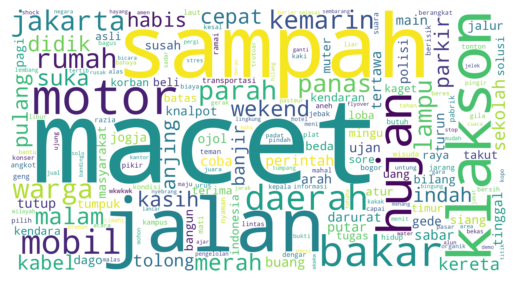

In [ ]:
###WordCloud
#Import Library untuk WordCloud
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

text = " ".join(title for title in negative_sentiment_data["Ulasan_clean"])
word_cloud = WordCloud(collocations = False, background_color = 'white',
                        width = 2048, height = 1080).generate(text)
#Menyimpan Gambar WordCloud
word_cloud.to_file('wordcloud.png')
#Menampilkan Hasil WordCloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# **HYPERPARAMETER TOPIK**

In [ ]:
from gensim.models import CoherenceModel, LdaModel


# Assuming you have already defined doc_clean, doc_term_matrix, and dictionary

corpus = [dictionary.doc2bow(doc) for doc in doc_clean]

def evaluate_model(model, corpus, texts, num_topics):
    # Compute coherence score
    coherence_model = CoherenceModel(model=model, texts=doc_clean, corpus=corpus, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    return coherence_score

# Running and Training LDA model on the document term matrix.
total_topics = [2, 3, 4, 5, 6, 7]  # Or other values as needed

highest_coherence_score = 0
best_model = None

for num_topics in total_topics:
    # Initialize model with a specific number of topics
    model = LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary, passes=10)


    # Evaluate model
    coherence_score = evaluate_model(model, corpus, doc_clean, num_topics)

    # Print results
    print(f"Num Topics: {num_topics}, Coherence Score: {coherence_score}")

    # Check if the current model has a higher coherence score
    if coherence_score > highest_coherence_score:
        highest_coherence_score = coherence_score
        best_model = model

# Save the best model
best_model.save("best_lda_model")

# Print information about the best model
print(f"Best Model - Num Topics: {best_model.num_topics}, Coherence Score: {highest_coherence_score}")


In [ ]:
from gensim.models import LdaModel
best_model = LdaModel.load("/content/best_lda_model")

In [ ]:
def evaluate_model(model, corpus, texts, num_topics):
    # Compute coherence score
    coherence_model = CoherenceModel(model=best_model, texts=texts, corpus=corpus, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    # Print coherence score
    print(f"Coherence Score for {num_topics} topics: {coherence_score}")

    # Print beta values for each topic
    for topic_id in range(num_topics):
        topic_terms = best_model.get_topic_terms(topicid=topic_id, topn=10)  # Adjust topn as needed
        print(f"Topik {topic_id}:")
        for term_id, beta in topic_terms:
            print(f"- Kata: {dictionary[term_id]}, Nilai Beta: {beta:.2f}")  # Format untuk 2 angka di belakang koma

    return coherence_score

# Print information about the best model

print("Beta values for best model:")
evaluate_model(best_model, corpus, doc_clean, best_model.num_topics)

Beta values for best model:
Coherence Score for 4 topics: 0.401561384668651
Topik 0:
- Kata: sampah, Nilai Beta: 0.03
- Kata: bakar, Nilai Beta: 0.01
- Kata: jalan, Nilai Beta: 0.01
- Kata: sekolah, Nilai Beta: 0.01
- Kata: macet, Nilai Beta: 0.01
- Kata: rumah, Nilai Beta: 0.01
- Kata: buang, Nilai Beta: 0.01
- Kata: warga, Nilai Beta: 0.01
- Kata: hujan, Nilai Beta: 0.01
- Kata: suka, Nilai Beta: 0.01
Topik 1:
- Kata: macet, Nilai Beta: 0.03
- Kata: jalan, Nilai Beta: 0.03
- Kata: pulang, Nilai Beta: 0.01
- Kata: mobil, Nilai Beta: 0.01
- Kata: malam, Nilai Beta: 0.01
- Kata: parkir, Nilai Beta: 0.01
- Kata: kaki, Nilai Beta: 0.00
- Kata: rumah, Nilai Beta: 0.00
- Kata: didik, Nilai Beta: 0.00
- Kata: kampus, Nilai Beta: 0.00
Topik 2:
- Kata: macet, Nilai Beta: 0.04
- Kata: sampah, Nilai Beta: 0.03
- Kata: motor, Nilai Beta: 0.01
- Kata: parah, Nilai Beta: 0.01
- Kata: klakson, Nilai Beta: 0.01
- Kata: daerah, Nilai Beta: 0.01
- Kata: bakar, Nilai Beta: 0.01
- Kata: panas, Nilai Beta

0.401561384668651

# **HYPERPARAMETER ALPHA DAN BETA**

In [ ]:
# @title Default title text
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

# Define a function to evaluate model with specific alpha and beta
def evaluate_model_with_hyperparams(corpus, texts, num_topics, alpha, beta):
    model = LdaModel(corpus=corpus, num_topics=4, id2word=dictionary, passes=10, alpha=alpha, eta=beta)
    coherence_model = CoherenceModel(model=model, texts=texts, corpus=corpus, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score, model

# Running and Training LDA model on the document term matrix.
total_alpha_values = [0.01,0.1,1,'symmetric', 'asymmetric']  # Alpha values to try
total_beta_values = [0.01,0.1,1,'symmetric']   # Beta values to try
best_coherence_score = 0
best_alpha = None
best_beta = None
best_model = None

for alpha in total_alpha_values:
    for beta in total_beta_values:
        # Evaluate model with specific alpha and beta
        coherence_score, model = evaluate_model_with_hyperparams(corpus, doc_clean, num_topics=4, alpha=alpha, beta=beta)

        # Print results
        print(f"Alpha: {alpha}, Beta: {beta}, Coherence Score: {coherence_score}")

        # Check if the current model has a higher coherence score
        if coherence_score > best_coherence_score:
            best_coherence_score = coherence_score
            best_alpha = alpha
            best_beta = beta
            best_model = model

# Print the best hyperparameters
print(f"Best Alpha: {best_alpha}, Best Beta: {best_beta}, Best Coherence Score: {best_coherence_score}")

# Save the best model
best_model.save("best_lda_model_hyperparameter")


Alpha: 0.01, Beta: 0.01, Coherence Score: 0.3921083460022824
Alpha: 0.01, Beta: 0.1, Coherence Score: 0.3223729101671785
Alpha: 0.01, Beta: 1, Coherence Score: 0.377701111259491
Alpha: 0.01, Beta: symmetric, Coherence Score: 0.36215845584875883
Alpha: 0.1, Beta: 0.01, Coherence Score: 0.3578460231981523
Alpha: 0.1, Beta: 0.1, Coherence Score: 0.36556833325519567
Alpha: 0.1, Beta: 1, Coherence Score: 0.3799849336117475
Alpha: 0.1, Beta: symmetric, Coherence Score: 0.33608102855605515
Alpha: 1, Beta: 0.01, Coherence Score: 0.3781151103711742
Alpha: 1, Beta: 0.1, Coherence Score: 0.42535891604891385
Alpha: 1, Beta: 1, Coherence Score: 0.35212322496034865
Alpha: 1, Beta: symmetric, Coherence Score: 0.4250143257295264
Alpha: symmetric, Beta: 0.01, Coherence Score: 0.3704210752021534
Alpha: symmetric, Beta: 0.1, Coherence Score: 0.4127055289413996
Alpha: symmetric, Beta: 1, Coherence Score: 0.3966701285872154
Alpha: symmetric, Beta: symmetric, Coherence Score: 0.353102129295757
Alpha: asymme

In [ ]:
from gensim.models import LdaModel
best_model_hyper = LdaModel.load("/content/best_lda_model_hyperparameter")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Check alpha
alpha = best_model.alpha

# Check beta
beta = best_model.eta

print("Alpha:", alpha)
print("Beta:", beta)

Alpha: [0.38961035 0.25974026 0.19480518 0.15584415]
Beta: [0.25 0.25 0.25 ... 0.25 0.25 0.25]


In [ ]:
from gensim.models import CoherenceModel

# Menghitung skor koherensi menggunakan CoherenceModel
coherence_model = CoherenceModel(model=best_model_hyper, texts=doc_clean, coherence='c_v')
coherence_score = coherence_model.get_coherence()

# Print skor koherensi
print("Coherence Score:", coherence_score)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score: 0.42535891604891385


In [ ]:
def evaluate_model(model, corpus, texts, num_topics):
    # Compute coherence score
    coherence_model = CoherenceModel(model=best_model, texts=texts, corpus=corpus, coherence='c_v')
    coherence_score = coherence_model.get_coherence()

    # Print coherence score
    print(f"Coherence Score for {num_topics} topics: {coherence_score}")

    # Print beta values for each topic
    for topic_id in range(num_topics):
        topic_terms = best_model.get_topic_terms(topicid=topic_id, topn=10)  # Adjust topn as needed
        print(f"Topik {topic_id}:")
        for term_id, beta in topic_terms:
            print(f"- Kata: {dictionary[term_id]}, Nilai Beta: {beta:.2f}")  # Format untuk 2 angka di belakang koma

    return coherence_score

# Print information about the best model

print("Beta values for best model:")
evaluate_model(best_model, corpus, doc_clean, best_model.num_topics)

Beta values for best model:
Coherence Score for 4 topics: 0.42535891604891385
Topik 0:
- Kata: sampah, Nilai Beta: 0.08
- Kata: bakar, Nilai Beta: 0.02
- Kata: perintah, Nilai Beta: 0.01
- Kata: daerah, Nilai Beta: 0.01
- Kata: buang, Nilai Beta: 0.01
- Kata: warga, Nilai Beta: 0.01
- Kata: kasih, Nilai Beta: 0.01
- Kata: darurat, Nilai Beta: 0.01
- Kata: tumpuk, Nilai Beta: 0.01
- Kata: didik, Nilai Beta: 0.01
Topik 1:
- Kata: macet, Nilai Beta: 0.08
- Kata: hujan, Nilai Beta: 0.02
- Kata: motor, Nilai Beta: 0.01
- Kata: parah, Nilai Beta: 0.01
- Kata: lampu, Nilai Beta: 0.01
- Kata: anjing, Nilai Beta: 0.01
- Kata: rumah, Nilai Beta: 0.01
- Kata: merah, Nilai Beta: 0.01
- Kata: pulang, Nilai Beta: 0.01
- Kata: wekend, Nilai Beta: 0.01
Topik 2:
- Kata: jalan, Nilai Beta: 0.05
- Kata: macet, Nilai Beta: 0.04
- Kata: klakson, Nilai Beta: 0.01
- Kata: malam, Nilai Beta: 0.01
- Kata: daerah, Nilai Beta: 0.01
- Kata: putar, Nilai Beta: 0.01
- Kata: kemarin, Nilai Beta: 0.01
- Kata: sabar, 

0.42535891604891385

In [ ]:
doc_clean.to_excel('nama_file1.xlsx', index=False)

In [ ]:
# Word Count of Topic Keywords

from collections import Counter
topics = best_model.show_topics(formatted=False)
data_flat = [w for w_list in doc_clean for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df_imp_wcount = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])
print(df_imp_wcount)

        word  topic_id  importance  word_count
0     sampah         0    0.083899         372
1      bakar         0    0.019938          85
2   perintah         0    0.008701          38
3     daerah         0    0.008326          83
4      buang         0    0.008048          33
5      warga         0    0.007798          74
6      kasih         0    0.007165          44
7    darurat         0    0.006758          31
8     tumpuk         0    0.006727          28
9      didik         0    0.005830          46
10     macet         1    0.082722         737
11     hujan         1    0.019118          96
12     motor         1    0.011796         104
13     parah         1    0.010716          70
14     lampu         1    0.009457          59
15    anjing         1    0.008879          40
16     rumah         1    0.008514          75
17     merah         1    0.007504          52
18    pulang         1    0.007173          44
19    wekend         1    0.006894          49
20     jalan 

In [ ]:
#Dominant topic and its percentage contribution in each topic
def format_topics_sentences(ldamodel=None, corpus=doc_term_matrix, texts=doc_clean):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [ ]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=best_model, corpus=doc_term_matrix, texts=doc_clean)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
print(df_dominant_topic.head(10))

<ipython-input-25-8f2b7c0756ee>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-25-8f2b7c0756ee>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-25-8f2b7c0756ee>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-25-8f2b7c0756ee>:16: FutureWarning: The frame.append method is deprecated and will be removed from p

   Document_No  Dominant_Topic  Topic_Perc_Contrib  \
0            0             2.0              0.6499   
1            1             2.0              0.5563   
2            2             3.0              0.9230   
3            3             3.0              0.4150   
4            4             3.0              0.6119   
5            5             2.0              0.4855   
6            6             0.0              0.6594   
7            7             1.0              0.3238   
8            8             0.0              0.6031   
9            9             2.0              0.3975   

                                            Keywords  \
0  jalan, macet, klakson, malam, daerah, putar, k...   
1  jalan, macet, klakson, malam, daerah, putar, k...   
2  macet, klakson, jakarta, mobil, motor, suka, p...   
3  macet, klakson, jakarta, mobil, motor, suka, p...   
4  macet, klakson, jakarta, mobil, motor, suka, p...   
5  jalan, macet, klakson, malam, daerah, putar, k...   
6  sampah, ba

<ipython-input-25-8f2b7c0756ee>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-25-8f2b7c0756ee>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-25-8f2b7c0756ee>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-25-8f2b7c0756ee>:16: FutureWarning: The frame.append method is deprecated and will be removed from p

In [ ]:
import pyLDAvis.gensim
import pickle
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

In [ ]:
import os
LDAvis_data_filepath = os.path.join('ldavis_prepared_'+str(4))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
corpus = [dictionary.doc2bow(text) for text in doc_clean]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(best_model, corpus, dictionary)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/pyLDAvis/_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/usr/local/lib/python3.10/dist-packages/pandas/core/dtypes/cast.py:1641: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  return np.find_common_type(types, [])


In [ ]:
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# proses ini mungkin agak lama
LDAvis_prepared

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.051676  0.007809       1        1  25.459407
1      0.085960 -0.154541       2        1  25.444242
0     -0.233253  0.003495       3        1  25.239288
3      0.095618  0.143236       4        1  23.857063, topic_info=        Term        Freq       Total Category  logprob  loglift
348   sampah  335.000000  335.000000  Default  30.0000  30.0000
205    macet  659.000000  659.000000  Default  29.0000  29.0000
1      jalan  231.000000  231.000000  Default  28.0000  28.0000
363    bakar   77.000000   77.000000  Default  27.0000  27.0000
794  klakson  144.000000  144.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
2      kabel   14.057403   36.093075   Topic4  -5.5014   0.4901
1      jalan   21.193713  231.957327   Topic4  -5.0909  -0.9598
137    parah   14.625339   63.001188   Topic4  -5.4618  -0.0273
533   parkir   12.503068   37.928805   Topic4  -5.6186   0.3234
18    daerah   13.886593   74.714517   Topic4  -5.5137  -0.2497

[307 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
673       1  0.218407    acara
673       2  0.728024    acara
673       4  0.072802    acara
192       2  1.017115    after
1710      1  0.118068   akibat
...     ...       ...      ...
760       2  0.836353   wisuda
760       4  0.104544   wisuda
678       1  0.796863   wkwkwk
678       2  0.183891   wkwkwk
2411      1  1.026691  yayasan

[531 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1, 4])

In [ ]:
# Mencetak nama-nama kolom
print(df_topic_sents_keywords.columns)

Index(['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords',
       'Ulasan_clean'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


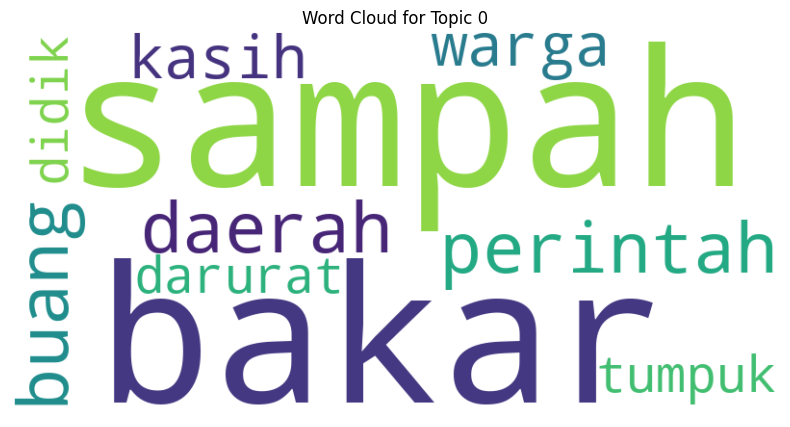

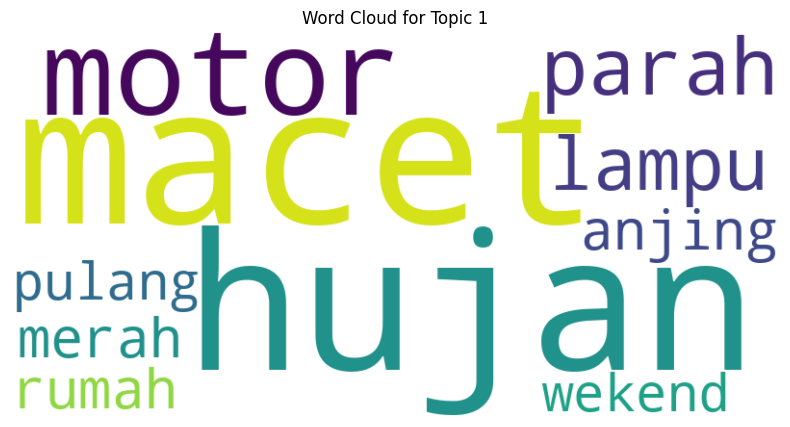

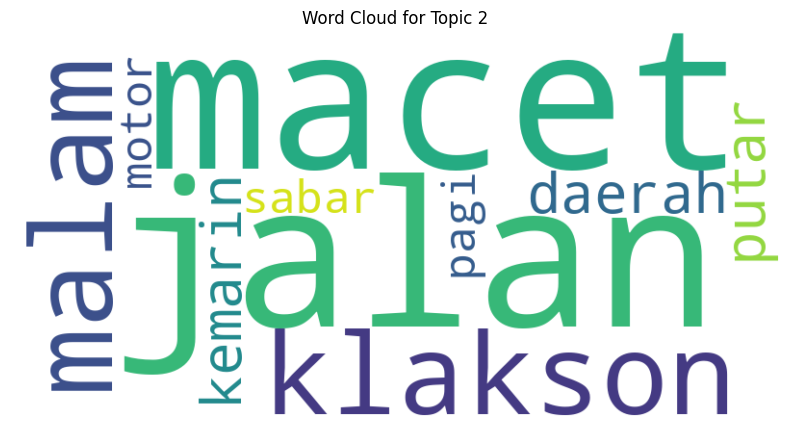

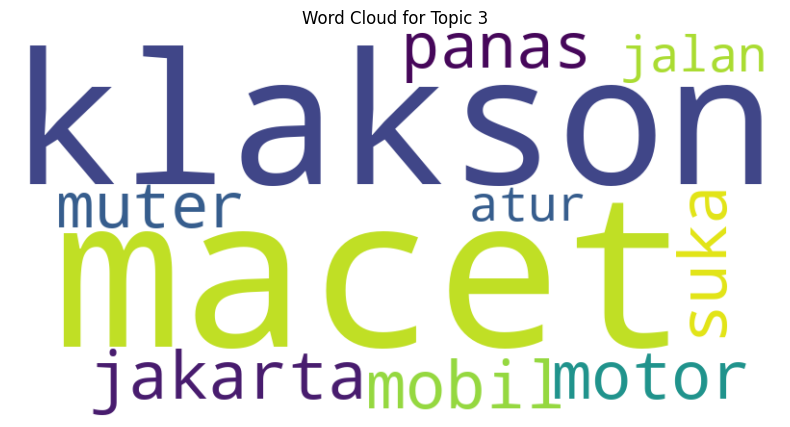

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Contoh: Membuat word cloud untuk setiap topik
for topic_id in df_imp_wcount['topic_id'].unique():
    # Filter DataFrame untuk mendapatkan data terkait topik tertentu
    topic_data = df_imp_wcount[df_imp_wcount['topic_id'] == topic_id]

    # Menggabungkan kata-kata kunci dari semua kata dalam topik tersebut
    topic_keywords = ' '.join(topic_data['word'])

    # Membuat word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(topic_keywords)

    # Menampilkan word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for Topic {topic_id}")
    plt.show()
